<a href="https://colab.research.google.com/github/Samuel20040521/2025Library/blob/main/B11202015_ML_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Class Fall 2025 Assignment 1**

In this assignment, we will learn about perceptron, multilayer perceptron (MLP), linear regression, support vector machine (SVM), and decision tree (CART, random-forest). You will need to answer the bolded questions and fill in the missing code snippets (marked by TODO).

Make a copy of this notebook using File > Save a copy in Drive and edit it with your answers.

WARNING: Do not put your name or any other personal identification information in this notebook.

**Rules**
- Use only `numpy` and `matplotlib` (no deep-learning frameworks).
  - *Exception: You may use sklearn's train_test_split for data splitting.*

- Fill in all `TODO` blocks. Answer bolded questions in this notebook.
- This assignment does not require GPU support. Please use
Runtime > Change runtime type > Python 3 > CPU.

**Submission**
- Please submit the completed .ipynb file to NTU COOL before the deadline(Deadline: 2025-10-10 23:59).
- You have a total of two extra days available for late submissions across all assignments.
  - If you want to use late days for an assignment, please send an email to ml-elsalab@googlegroups.com specifying the number of late days you intend to use (in units of days).


**Grading**
- The first four questions(Q1-Q4) together account for 75 points.


# **Question 1: Perceptron**

This question walks you through the perceptron family, from a single-layer perceptron to a multilayer perceptron (MLP) **with two hidden layers**.

**Grading**: This question is worth **10 points total**.




## **Part A — Single-layer perceptron (linearly separable)**
- Implement a single-layer perceptron from scratch.
- Train/evaluate on AND and OR.
- Visualize the decision boundary.

**Scoring (2 points)**
- Your perceptron must achieve accuracy = 1.0 on both AND and OR datasets.
- You must visualize the decision boundary using the provided function `plot_decision_boundary`.
- Partial credit is not given if accuracy < 1.0 or if the decision boundary is not clearly separable.


⚠️ **Do not modify this cell** — any changes will result in a score of **0** for your implementation of this problem.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def make_logic_gate(gate="AND", n=200, noise=0.05):
    X = np.random.randint(0, 2, size=(n, 2)).astype(float)
    if noise > 0:
        X = X + np.random.normal(0, noise, size=X.shape)
    if gate == "AND":
        y = ((X[:, 0] > 0.5) & (X[:, 1] > 0.5)).astype(int)
    elif gate == "OR":
        y = ((X[:, 0] > 0.5) | (X[:, 1] > 0.5)).astype(int)
    else:
        raise ValueError("Unsupported gate")
    return X, y


def train_test_split(X, y, test_ratio=0.3):
    n = X.shape[0]
    idx = np.random.permutation(n)
    t = int(n * test_ratio)
    te, tr = idx[:t], idx[t:]
    return X[tr], X[te], y[tr], y[te]

def accuracy(y_true, y_pred):
    return np.mean((y_true == y_pred).astype(float))

def plot_decision_boundary(predict_fn, X, y, title="Decision boundary"):
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300),
        np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = predict_fn(grid).reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, zz, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, s=12)
    plt.title(title)
    plt.show()


In [ ]:
# Part A: Single-layer perceptron (linearly separable)
# Implement train/predict using the perceptron learning rule.

def perceptron_train(X, y, lr=0.1, epochs=30):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    y_pm = np.where(y == 0, -1, 1)  # map to {-1,+1}

    for _ in range(epochs):
      for i in range(n):
        xi = X[i]
        yi = y_pm[i]
        # TODO: compute signed prediction in {-1,+1}
        y_pred = np.sign(np.dot(w,xi) + b)
        # TODO: perceptron update on mistake
        if y_pred != yi:
          w = w + lr * yi * xi
          b = b + lr * yi
    return w, b


def perceptron_predict(X, w, b):
    # TODO: Implement the perceptron prediction function logic
    # NOTE: return {0,1} to match dataset
    z = np.dot(X,w) + b
    return np.where(z > 0, 1 , 0)






⚠️ **Do not modify this cell** — any changes will result in a score of **0** for your implementation of this problem.

[AND] train acc: 1.0
[AND] test  acc: 1.0


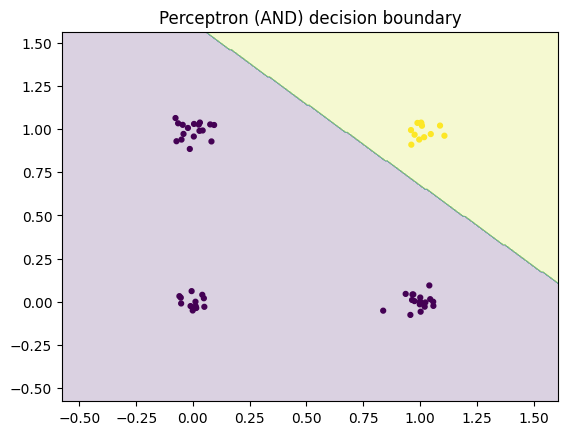

[OR] train acc: 1.0
[OR] test  acc: 1.0


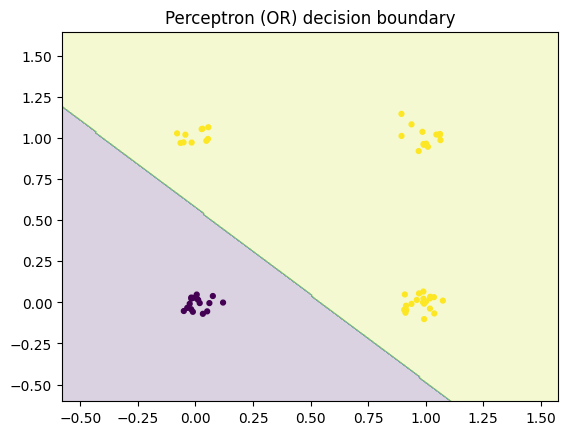

In [ ]:
# Train/eval on AND & OR
for gate in ["AND", "OR"]:
    Xg, yg = make_logic_gate(gate, n=200, noise=0.05)
    Xtr, Xte, ytr, yte = train_test_split(Xg, yg, 0.3)
    w, b = perceptron_train(Xtr, ytr, lr=0.1, epochs=30)
    print(f"[{gate}] train acc:", accuracy(ytr, perceptron_predict(Xtr, w, b)))
    print(f"[{gate}] test  acc:", accuracy(yte, perceptron_predict(Xte, w, b)))
    plot_decision_boundary(lambda Z: perceptron_predict(Z, w, b),
                           Xte, yte, title=f"Perceptron ({gate}) decision boundary")

## **Part B — Failure case on XOR**
- Apply the same perceptron to XOR.
- You do not need to implement anything. Simply observe the performance of a single-layer perceptron on the XOR dataset.

⚠️ You should observe that the perceptron fails on XOR. This demonstrates that a single-layer perceptron cannot solve problems that are not linearly separable.  




[XOR] perceptron test acc (expected low): 0.5


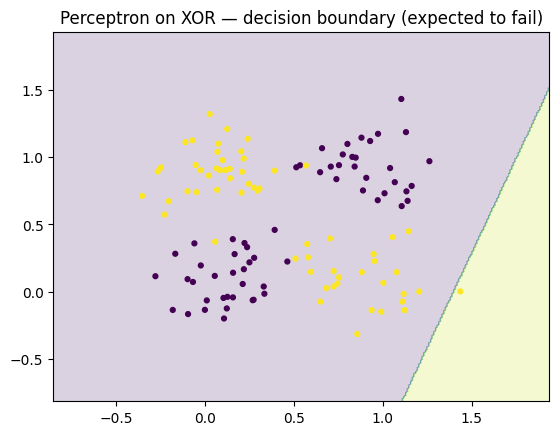

In [ ]:
# Part B: Single-layer perceptron on XOR (expect failure)

def make_xor_clustered(n=400, noise=0.04):
    nq = n // 4
    cov = noise * np.eye(2)
    def blob(center, k): return np.random.multivariate_normal(center, cov, size=k)
    X00 = blob([0.1, 0.1], nq);  y00 = np.zeros(nq, dtype=int)
    X11 = blob([0.9, 0.9], nq);  y11 = np.zeros(nq, dtype=int)
    X10 = blob([0.9, 0.1], nq);  y10 = np.ones(nq,  dtype=int)
    X01 = blob([0.1, 0.9], nq);  y01 = np.ones(nq,  dtype=int)
    X = np.vstack([X00, X11, X10, X01])
    y = np.concatenate([y00, y11, y10, y01])
    return X, y

X, y = make_xor_clustered(n=400, noise=0.04)

Xtr, Xte, ytr, yte = train_test_split(X, y, 0.3)
w_xor, b_xor = perceptron_train(Xtr, ytr, lr=0.1, epochs=50)
print("[XOR] perceptron test acc (expected low):", accuracy(yte, perceptron_predict(Xte, w_xor, b_xor)))
plot_decision_boundary(lambda Z: perceptron_predict(Z, w_xor, b_xor),
                       Xte, yte, title="Perceptron on XOR — decision boundary (expected to fail)")


## **Part C — MLP with two hidden layers (solving XOR)**
- Implement a 2-hidden-layer MLP (input → hidden1 → hidden2 → output) using NumPy only.
- Use non-linear activations (e.g., `tanh` or `sigmoid`) in hidden layers and a `sigmoid` output.
- Train/evaluate on XOR.

**Scoring (6 points)**  
- You must implement a true **2-hidden-layer MLP** (not fewer).  
- Your model should achieve **test accuracy ≥ 90%** on the XOR dataset.  
- You must use `plot_decision_boundary` to produce a **clear non-linear decision boundary**.  
  - It is acceptable if some points are misclassified, as long as the boundary shows correct separation behavior.


In [ ]:
# Part C: MLP with 2 hidden layers (solve XOR)
# Architecture: input(2) -> hidden1(h1, nonlin) -> hidden2(h2, nonlin) -> output(1, sigmoid)
# Loss: Binary Cross-Entropy (BCE)

# Activations
def sigmoid(z):
   # TODO: implement sigmoid function
   return 1 / ( 1 + np.exp(-z))
def sigmoid_grad(a):
   # TODO: calculate the gradient of sigmoid function
   return a / (1 - a)

def tanh(z): return np.tanh(z)
def tanh_grad(a):
   # TODO: calculate the gradient of tanh function
   return 1 - a**2

def xavier_init(fan_in, fan_out, rng):
    limit = np.sqrt(6.0 / (fan_in + fan_out))
    return rng.uniform(-limit, limit, size=(fan_in, fan_out))

def mlp2_init_params(d, h1, h2, seed=42):
    rng = np.random.default_rng(seed)
    params = {
        "W1": xavier_init(d,  h1, rng), "b1": np.zeros((1, h1)),
        "W2": xavier_init(h1, h2, rng), "b2": np.zeros((1, h2)),
        "W3": xavier_init(h2, 1 , rng), "b3": np.zeros((1, 1))
    }
    return params

def mlp2_forward(X, params, activation="tanh"):
    act, act_grad = (tanh, tanh_grad) if activation == "tanh" else (sigmoid, sigmoid_grad)

    W1, b1 = params["W1"], params["b1"]
    W2, b2 = params["W2"], params["b2"]
    W3, b3 = params["W3"], params["b3"]

    # TODO: Forward pass
    z1 = np.dot(X,W1) + b1
    # Linear input to first hidden layer
    a1 = act(z1)
    # Output of first hidden layer (after non-linearity)
    z2 = np.dot(a1,W2) + b2
    # First hidden layer to second hidden layer
    a2 = act(z2)
    # Output of second hidden layer (after non-linearity)
    z3 = np.dot(a2,W3) + b3
    # Second hidden layer to output
    a3 = act(z3)
    # Final model output (after sigmoid)

    cache = {"X": X, "z1": z1, "a1": a1, "z2": z2, "a2": a2, "z3": z3, "a3": a3,
             "activation": activation}
    return a3, cache

def mlp2_backward(y, params, cache):
    """Compute gradients of BCE loss w.r.t. parameters.
       y: (n,) or (n,1) labels in {0,1}
    """
    y = y.reshape(-1, 1)
    act_grad = tanh_grad if cache["activation"] == "tanh" else sigmoid_grad
    W1, W2, W3 = params["W1"], params["W2"], params["W3"]
    X, a1, a2, a3 = cache["X"], cache["a1"], cache["a2"], cache["a3"]
    n = X.shape[0]
    eps = 1e-8

    # TODO: output layer (gradient at z3)
    dz3 =  (a3 - y) / n
    # Hint: dL/dz3, for BCE+sigmoid it simplifies to (a3 - y)/n
    dW3 =  np.dot(np.transpose(a2) , dz3)
    # Hint: gradient of W3
    db3 =  np.sum(dz3)
    # Hint: gradient of b3 = sum over batch of dz3

    # TODO: backprop signal into hidden2
    da2 =  np.dot(dz3 , np.transpose(W3))
    # Hint: backprop into a2
    dz2 =  da2 * act_grad(a2)
    # Hint: dL/dz2
    dW2 =  np.dot(np.transpose(a1) , dz2)
    # Hint: gradient of W2
    db2 =  np.sum(dz2)
    # Hint: gradient of b2 = sum over batch of dz2

    # TODO: backprop signal into hidden1
    da1 =  np.dot(dz2 , np.transpose(W2))
    # Hint: backprop into a1
    dz1 =  da1 * act_grad(a1)
    # Hint: dL/dz1
    dW1 =  np.dot(np.transpose(X) , dz1)
    # Hint: gradient of W1
    db1 =  np.sum(dz1)
    # Hint: gradient of b1 = sum over batch of dz1

    grads = {"dW1": dW1, "db1": db1,
             "dW2": dW2, "db2": db2,
             "dW3": dW3, "db3": db3}
    loss = -np.mean(y*np.log(a3+eps) + (1-y)*np.log(1-a3+eps))
    return grads, loss

def mlp2_update(params, grads, lr):
    for kW, kb, gdW, gdb in [
        ("W1","b1","dW1","db1"),
        ("W2","b2","dW2","db2"),
        ("W3","b3","dW3","db3"),
    ]:
        params[kW] -= lr * grads[gdW]
        params[kb] -= lr * grads[gdb]

def mlp2_predict_proba(X, params):
    out, _ = mlp2_forward(X, params, activation=params.get("activation","tanh"))
    return out.ravel()

def mlp2_predict(X, params):
    return (mlp2_predict_proba(X, params) >= 0.5).astype(int)

def mlp2_train(X, y, h1=8, h2=8, lr=0.3, epochs=3000, activation="tanh",
               verbose=True, print_every=100, seed=42):
    params = mlp2_init_params(d=X.shape[1], h1=h1, h2=h2, seed=seed)
    params["activation"] = activation
    history = []
    for epoch in range(1, epochs+1):
        # forward
        a3, cache = mlp2_forward(X, params, activation=activation)
        # backward
        grads, loss = mlp2_backward(y, params, cache)
        history.append(loss)
        # update
        mlp2_update(params, grads, lr)
        if verbose and epoch % print_every == 0:
            acc = accuracy(y, mlp2_predict(X, params))
            print(f"Epoch {epoch:4d}: loss={loss:.4f}, acc={acc:.3f}")
    return params, history

# Train on XOR

X, y = make_xor_clustered(n=400, noise=0.04)

Xtr, Xte, ytr, yte = train_test_split(X, y, 0.3)
params, history = mlp2_train(Xtr, ytr, h1=8, h2=8, lr=0.3, epochs=2000, activation="tanh",
                             verbose=True, print_every=50)






/tmp/ipython-input-794523245.py:98: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(y*np.log(a3+eps) + (1-y)*np.log(1-a3+eps))


Epoch   50: loss=0.6490, acc=0.629
Epoch  100: loss=nan, acc=0.925
Epoch  150: loss=nan, acc=0.925
Epoch  200: loss=nan, acc=0.939
Epoch  250: loss=nan, acc=0.954
Epoch  300: loss=nan, acc=0.961
Epoch  350: loss=nan, acc=0.975
Epoch  400: loss=nan, acc=0.975
Epoch  450: loss=nan, acc=0.979
Epoch  500: loss=nan, acc=0.979
Epoch  550: loss=nan, acc=0.979
Epoch  600: loss=nan, acc=0.979
Epoch  650: loss=nan, acc=0.979
Epoch  700: loss=nan, acc=0.979
Epoch  750: loss=nan, acc=0.979
Epoch  800: loss=nan, acc=0.979
Epoch  850: loss=nan, acc=0.979
Epoch  900: loss=nan, acc=0.979
Epoch  950: loss=nan, acc=0.979
Epoch 1000: loss=nan, acc=0.979
Epoch 1050: loss=nan, acc=0.975
Epoch 1100: loss=nan, acc=0.979
Epoch 1150: loss=nan, acc=0.979
Epoch 1200: loss=nan, acc=0.975
Epoch 1250: loss=nan, acc=0.979
Epoch 1300: loss=nan, acc=0.979
Epoch 1350: loss=nan, acc=0.979
Epoch 1400: loss=nan, acc=0.975
Epoch 1450: loss=nan, acc=0.975
Epoch 1500: loss=nan, acc=0.979
Epoch 1550: loss=nan, acc=0.979
Epoch


⚠️ **Do not modify this cell** — any changes will result in a score of **0** for your implementation of this problem.

⚠️ Your test accuracy should be **≥ 90%** and the decision boundary should clearly separate the XOR clusters.


Train acc: 0.9785714285714285
Test acc: 0.875


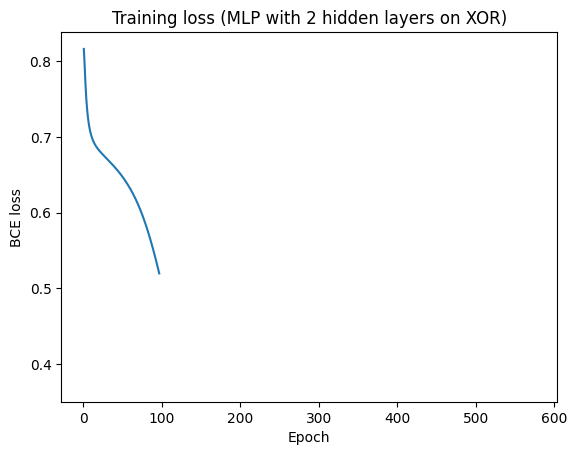

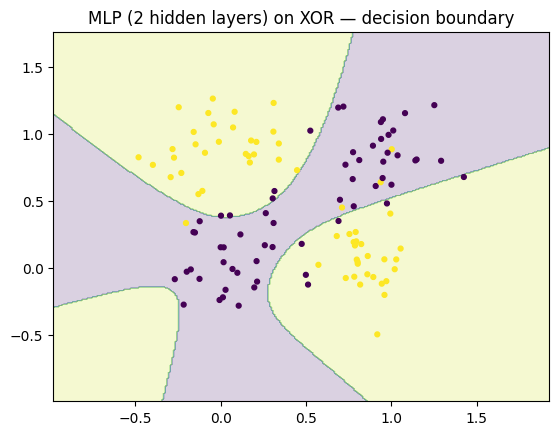

In [ ]:
print("Train acc:", accuracy(ytr, mlp2_predict(Xtr, params)))
print("Test acc:", accuracy(yte, mlp2_predict(Xte, params)))

# loss curve
plt.figure()
plt.plot(history)
plt.xlabel("Epoch")
plt.ylabel("BCE loss")
plt.title("Training loss (MLP with 2 hidden layers on XOR)")
plt.show()

# decision boundary
plot_decision_boundary(lambda Z: mlp2_predict(Z, params),
                       Xte, yte,
                       title="MLP (2 hidden layers) on XOR — decision boundary")

### **Questions (2 pts total, 1 pt each)**

1. What happens on XOR with a single-layer perceptron, and why?  
**Answer:**  Since XOR data points are not linearly separable. There is no straight line that can separate positive and negative examples.

2.  Why do two hidden layers with non-linear activations solve XOR?  
**Answer:**  Two hidden layers with non-linear activations can learn non-linear feature combinations.




#**Question 2: Regression**

This question walks you through different regression techniques, from **simple linear regression** to **Support Vector Regression (SVR)**, implementing them from scratch using NumPy.

**Grading**: This question is worth **15 points total**.



## **Part A — Linear Regression (Simple Case)**

### Problem Statement:
In this part, you will implement **Linear Regression** from scratch using the closed-form solution (Normal Equation).

You will use the following equation to generate the dataset:
$[
y = 3x + 5 + \epsilon
]$
where $\epsilon$ is random noise drawn from a standard normal distribution.

- Generate a dataset containing 100 samples, and split it into training and test sets (80% for training, 20% for testing).
- Implement **Closed-form solution** (Normal Equation) to compute the regression coefficients $\theta$.
- Implement **Gradient Descent** to find the regression coefficients, and compare the results with the closed-form solution. Observe the convergence speed and accuracy.

### Instructions:
1. Implement the **closed-form solution** to compute the regression coefficients $\theta$.
2. Implement **gradient descent** for linear regression and compare it with the closed-form solution.
3. Visualize the data and the fitted regression line from both methods.
4. Comment on the differences between the two methods.

### Scoring (3 points)
- Correct implementation of the **Closed-form solution** (Normal Equation).  
- Correct implementation of **Gradient Descent**.  
- Both methods must achieve **test MSE < 0.65** and show a **clear regression line** when plotted.  

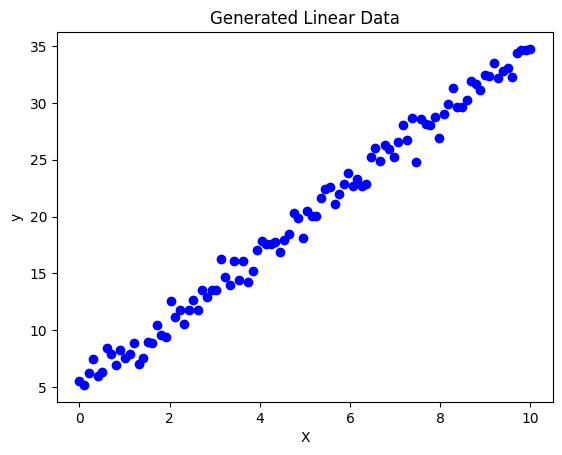

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)  # for reproducibility
X = np.linspace(0, 10, 100)  # 100 data points from 0 to 10
y = 3 * X + 5 + np.random.randn(100)  # y = 3x + 5 + noise

plt.scatter(X, y, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Linear Data')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]  # Adding bias term (X0 = 1)
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]  # Adding bias term (X0 = 1)



In [ ]:
# Part A — Linear Regression



def closed_form_solution(X, y):
  # TODO: Implement the closed-form solution for Linear Regression (Normal Equation)
  # θ = (X^T * X)^(-1) * X^T * y
  return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),y)

# Compute the closed-form solution for the coefficients
theta_closed_form = closed_form_solution(X_train_bias, y_train)
print("Closed-form solution theta:", theta_closed_form)




def gradient_descent(X, y, learning_rate=0.01, epochs=1000):

    m = len(y)
    theta = np.zeros(X.shape[1])  # Initialize parameters (theta) to zeros
    for _ in range(epochs):
        # TODO: Implement Gradient Descent for Linear Regression
        gradient = np.dot(np.transpose(X),np.dot(X,theta) - y) / m
        theta -= learning_rate * gradient  # Update the parameters
    return theta


def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Run gradient descent to find the coefficients
theta_gd = gradient_descent(X_train_bias, y_train, learning_rate=0.01, epochs=2000)
print("Gradient Descent theta:", theta_gd)




Closed-form solution theta: [4.81978521 3.01208404]
Gradient Descent theta: [4.78424116 3.01735891]



⚠️ **Do not modify this cell** — any changes will result in a score of **0** for your implementation of this problem.

⚠️ Reminder: Both methods must achieve test MSE < 0.65 to receive full credit.


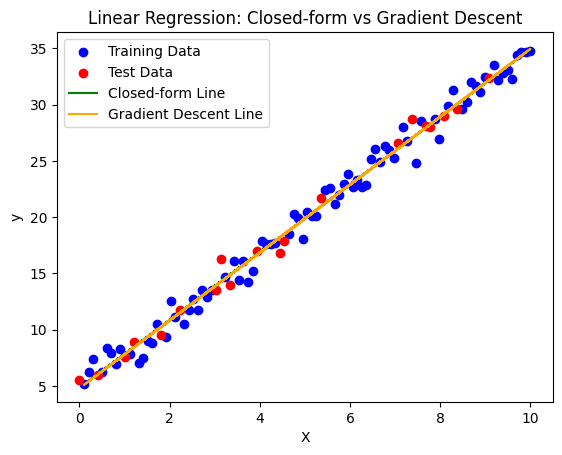

Mean Squared Error (Closed-form): 0.6220422422901811
Mean Squared Error (Gradient Descent): 0.6231056581799821


In [ ]:
# Plot the fitted line for both methods
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Plot the line from the closed-form solution
y_train_pred_cf = X_train_bias.dot(theta_closed_form)
y_test_pred_cf = X_test_bias.dot(theta_closed_form)
plt.plot(X_train, y_train_pred_cf, color='green', label='Closed-form Line')

# Plot the line from gradient descent
y_train_pred_gd = X_train_bias.dot(theta_gd)
y_test_pred_gd = X_test_bias.dot(theta_gd)
plt.plot(X_train, y_train_pred_gd, color='orange', label='Gradient Descent Line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Closed-form vs Gradient Descent')
plt.legend()
plt.show()




mse_cf = mean_squared_error(y_test, y_test_pred_cf)
mse_gd = mean_squared_error(y_test, y_test_pred_gd)

print(f"Mean Squared Error (Closed-form): {mse_cf}")
print(f"Mean Squared Error (Gradient Descent): {mse_gd}")

## **Part B — Logistic Regression (Binary Classification)**

### Problem Statement:
In this part, you will implement **logistic regression** from scratch to solve a binary classification problem.

You will generate a simple synthetic dataset for binary classification with two features. The labels will be 0 or 1.

- Implement **Sigmoid function** and **cross-entropy loss**.
- Use **Gradient Descent** to train the logistic regression model.
- Evaluate the performance using **accuracy** and visualize the decision boundary.

### Instructions:
1. Implement the **Sigmoid function** and **cross-entropy loss**.
2. Implement **Gradient Descent** to minimize the loss and train the model.
3. Visualize the decision boundary of the trained model.
4. Compute the **accuracy** on the test data.

### Scoring (3 points)
- Correct implementation of the **Cross-Entropy Loss function**.  
- Correct implementation of **Gradient Descent**.  
- The model must achieve **100% accuracy on the test set** and show a **clear linear decision boundary** when plotted.


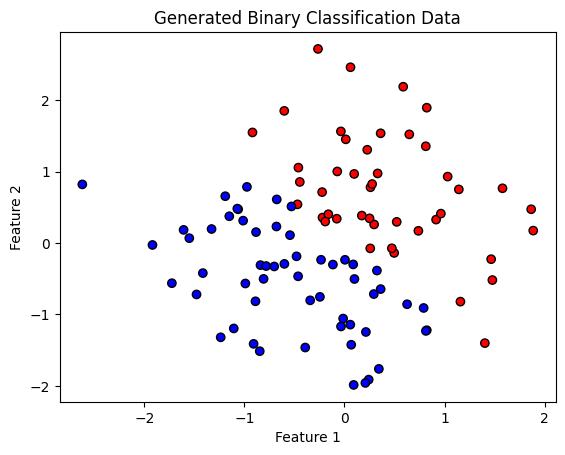

In [ ]:
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Label 1 if sum of features > 0, else 0

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Binary Classification Data')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to X for the intercept (bias) term
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]  # Adding bias term (X0 = 1)
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]  # Adding bias term (X0 = 1)


In [ ]:
# Part B — Logistic Regression


def cross_entropy_loss(y_true, y_pred):
    #TODO: Implement the Cross-Entropy Loss function
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])  # Initialize parameters (theta) to zeros
    for _ in range(epochs):
        # Compute predictions using the Sigmoid function
        y_pred = sigmoid(X.dot(theta))
        # TODO: Implement Gradient Descent for Logistic Regression
        gradient = np.dot(np.transpose(X),y_pred - y) / m
        theta -= learning_rate * gradient
    return theta






⚠️ **Do not modify this cell** — any changes will result in a score of **0** for your implementation of this problem.




Accuracy: 100.00%


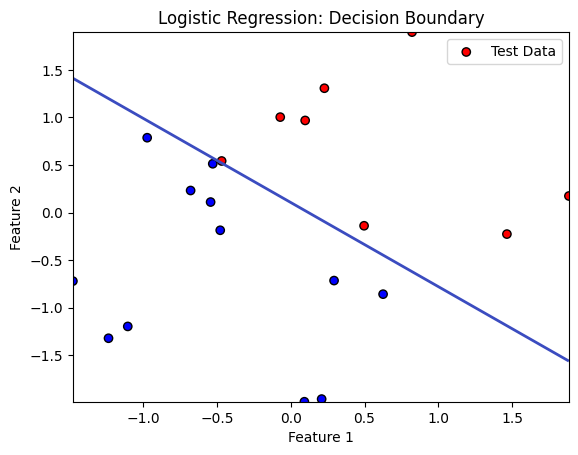

In [ ]:
theta = gradient_descent(X_train_bias, y_train, learning_rate=0.01, epochs=1000)

y_test_pred_prob = sigmoid(X_test_bias.dot(theta))

y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

accuracy = np.mean(y_test_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolors='k', label='Test Data')

xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100))
grid_points = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]
grid_preds = sigmoid(grid_points.dot(theta)).reshape(xx.shape)

plt.contour(xx, yy, grid_preds, levels=[0.5], cmap='coolwarm', linewidths=2)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression: Decision Boundary')
plt.legend()
plt.show()

## **Part C — Support Vector Regression (SVR)**

### Problem Statement:
In this part, you will implement **Support Vector Regression (SVR)** from scratch using the **ε-insensitive loss function** and the **RBF kernel**.

You will use a non-linear synthetic dataset for regression (e.g., $y = \sin(x) + \epsilon$).

- Implement **SVR** using **RBF kernel**.
- Train the model on the dataset and compare it with **linear regression**.
- Visualize the **predicted curve** and compare it with the true curve.

### Instructions:
1. Implement **SVR** using the **RBF kernel**.
2. Train the model on the non-linear dataset and compare it with **linear regression**.
3. Visualize the true curve, the **linear regression fit**, and the **SVR fit**.
4. Report the **Mean Squared Error (MSE)** for both models and discuss the advantages of **SVR** over **linear regression** in handling non-linear data.


### Scoring (6 points)

- **RBF kernel implemented correctly** — **2 pts**  
  - The function `rbf_kernel_matrix(...)` must correctly compute the RBF kernel.

- **Final results** — **4 pts**  
  - **MSE_svr < MSE_lr**  
  - **MSE_svr < 0.05**  
  - The visualization should clearly show:  
    - Linear Regression produces an approximately straight line.  
    - SVR successfully fits the non-linear sine-shaped data.


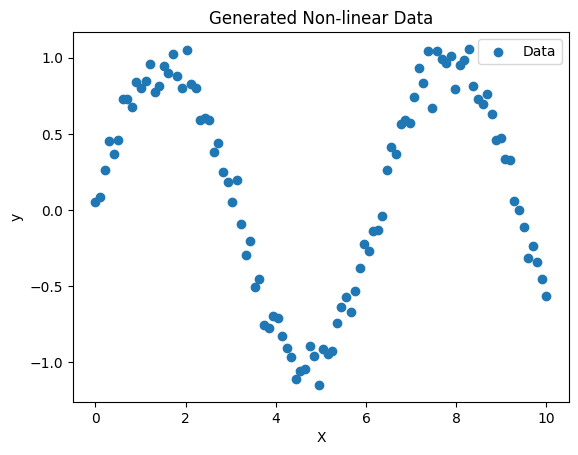

In [ ]:
np.random.seed(42)  # reproducibility
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.randn(100) * 0.1

# Visualize the dataset
plt.scatter(X, y, label='Data')
plt.xlabel('X'); plt.ylabel('y'); plt.title('Generated Non-linear Data')
plt.legend(); plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Part C — Support Vector Regression (SVR)

# RBF kernel
def rbf_kernel_matrix(X, Z, gamma=0.8):
    # TODO: Implement the RBF kernel computation
    X = np.asarray(X, dtype=float)
    Z = np.asarray(Z, dtype=float)
    # pairwise squared distances: ||X_i - Z_j ||^2
    X2 = np.sum(X**2, axis=1, keepdims=True)
    Z2 = np.sum(Z**2, axis=1, keepdims=True)
    dist2 = X2 - 2 * np.dot(X, Z.T) + Z2.T
    return np.exp(-gamma * dist2)

# ε-SVR (Simplified)
# We optimize the dual problem in terms of β = α − α*.
# Instead of solving the full quadratic program (QP),
# we use Projected Subgradient Ascent as a simplified training approach.
# This avoids implementing a full QP solver while still capturing the essence of SVR.

class EpsilonSVR:
    def __init__(self, C=1.0, epsilon=0.1, gamma=0.8,
                 iters=4000, lr=0.02, lr_decay=0.0, verbose=False):
        self.C = float(C)
        self.epsilon = float(epsilon)
        self.gamma = float(gamma)
        self.iters = int(iters)
        self.lr = float(lr)
        self.lr_decay = float(lr_decay)
        self.verbose = verbose
        # learned params
        self.X_train = None
        self.beta = None   # β = α − α*
        self.b = 0.0
        self.hist = {"dual": [], "eq_resid": []}

    @staticmethod
    def _project_box(beta, C):
        return np.clip(beta, -C, C)

    @staticmethod
    def _project_sum_zero(beta):
        #Project onto {beta: sum beta = 0} by removing the mean.
        return beta - np.mean(beta)

    def _dual_objective(self, K, y, beta):
        #Dual objective: D(β) = -1/2 β^T K β - ε * ||β||_1 + y^T β
        return float(-0.5 * beta @ (K @ beta) - self.epsilon * np.sum(np.abs(beta)) + y @ beta)

    def _subgrad(self, K, y, beta, epsilon):
        # TODO: Implement the subgradient of D wrt β.
        # Hint: Formula: g = y - Kβ - ε * sign(β)
        return y - K @ beta - epsilon * np.sign(beta)



    def fit(self, X, y):
        # Train ε-SVR in the dual over β = α − α*.
        X = np.asarray(X); y = np.asarray(y).astype(float)
        n = len(y)
        self.X_train = X.copy()
        K = rbf_kernel_matrix(X, X, gamma=self.gamma)


        beta = np.zeros(n)

        best_D = -np.inf
        since_best = 0

        for t in range(self.iters):
            # TODO: Update β using the subgradient ascent step
            eta = self.lr / (1.0 +self.lr_decay * t)

            # TODO: project onto constraints
            # 1) subgradient ascent step
            g = self._subgrad(K, y, beta, self.epsilon)
            beta += eta * g

            # 2) project to constraints
            beta = self._project_box(beta, self.C)
            beta = self._project_sum_zero(beta)

            if t % 20 == 0 or t == self.iters - 1:
                D = self._dual_objective(K, y, beta)
                self.hist["dual"].append(D)
                self.hist["eq_resid"].append(abs(np.sum(beta)))

                if D > best_D + 1e-10:
                    best_D = D
                    since_best = 0
                else:
                    since_best += 1

                if self.verbose and t % 200 == 0:
                    print(f"[iter {t}] dual={D:.6f}, eq_resid={self.hist['eq_resid'][-1]:.2e}")


        self.beta = beta

        # compute bias b
        alpha_pos = np.maximum(beta, 0.0)       # α
        alpha_neg = np.maximum(-beta, 0.0)      # α*
        Kbeta = K @ beta

        idx_pos = np.where((alpha_pos > 1e-6) & (alpha_pos < self.C - 1e-6))[0]
        idx_neg = np.where((alpha_neg > 1e-6) & (alpha_neg < self.C - 1e-6))[0]

        b_vals = []
        if len(idx_pos) > 0:
            b_vals.extend(list(y[idx_pos] - self.epsilon - Kbeta[idx_pos]))
        if len(idx_neg) > 0:
            b_vals.extend(list(y[idx_neg] + self.epsilon - Kbeta[idx_neg]))
        if len(b_vals) == 0:
            resid = np.abs(np.abs(y - Kbeta) - self.epsilon)
            idx = np.argsort(resid)[:10]
            b_vals.extend(list(y[idx] - Kbeta[idx]))

        self.b = float(np.mean(b_vals))
        return self

    def predict(self, X):
        # TODO: Implement the prediction function for SVM with RBF kernel.
        # Hint: Formula: f(x) = Σ_j β_j * K(x_j, x) + b
        X = np.asarray(X)
        Kxz = rbf_kernel_matrix(X, self.X_train, gamma=self.gamma)
        return Kxz @ self.beta + self.b


def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)



⚠️ **Do not modify this cell** — any changes will result in a score of **0** for your implementation of this problem.




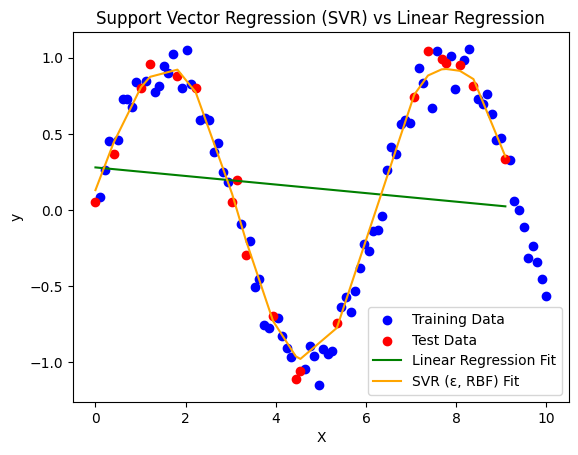

Mean Squared Error (Linear Regression): 0.5517
Mean Squared Error (SVR): 0.0070


In [ ]:
# Train SVR vs Linear Regression
svr = EpsilonSVR(C=1.5, epsilon=0.1, gamma=0.8, iters=4000, lr=0.02, verbose=False)
svr.fit(X_train, y_train)
y_test_pred_svr = svr.predict(X_test)

# Linear regression baseline
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias  = np.c_[np.ones(X_test.shape[0]),  X_test]
theta_lr = np.linalg.pinv(X_train_bias.T @ X_train_bias) @ (X_train_bias.T @ y_train)
y_test_pred_lr = X_test_bias @ theta_lr

order = np.argsort(X_test.ravel())
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test,  y_test,  color='red',  label='Test Data')
plt.plot(X_test[order], y_test_pred_lr[order],  color='green',  label='Linear Regression Fit')
plt.plot(X_test[order], y_test_pred_svr[order], color='orange', label='SVR (ε, RBF) Fit')
plt.xlabel('X'); plt.ylabel('y'); plt.title('Support Vector Regression (SVR) vs Linear Regression')
plt.legend(); plt.show()


mse_lr  = mean_squared_error(y_test, y_test_pred_lr)
mse_svr = mean_squared_error(y_test, y_test_pred_svr)

print(f"Mean Squared Error (Linear Regression): {mse_lr:.4f}")
print(f"Mean Squared Error (SVR): {mse_svr:.4f}")

### **Questions (3 pts total, 1 pt each)**

1. Why can the closed-form solution (Normal Equation) work for linear regression? Why is it more efficient than gradient descent in this case?  
**Answer:**  Because the MSE loss is convex quadratic, the Normal Equation gives the exact global minimum in one step, avoiding iterative updates.

2. Why is logistic regression suitable for binary classification tasks, and what happens when we use it for multi-class classification?  
**Answer:**  Logistic regression maps inputs to probabilities with a sigmoid for two classes; for multi-class tasks it must be extended (e.g., one-vs-rest or softmax).

3. Why does Support Vector Regression (SVR) handle non-linear problems better than linear regression? Discuss the role of the kernel.  
**Answer:**  SVR uses kernels (like RBF) to map data into higher dimensions, allowing it to model non-linear patterns that linear regression cannot.


# **Question 3: Support Vector Machine (SVM + Kernels)**

**Grading**: This question is worth **25 points total**.



## **Part A — Primal Soft-margin Linear SVM**

### Problem Statement
In this part, you will implement a **linear SVM** in the **primal formulation** with **hinge loss** and **L2 regularization**, trained by **subgradient descent**. Assume binary labels ( $y$ in $\{-1, +1\}$) .

We minimize the following objective:
$[
\min_{w,b}\quad
\frac{1}{2}\|w\|^2 \;+\; C \sum_{i=1}^n \max\big(0,\; 1 - y_i(w^\top x_i + b)\big)]$
where $(C>0)$ controls the trade-off between the **margin** and the **violation** penalty. The constant “1” is a normalized **margin threshold**; the geometric margin is inversely proportional to $(\|w\|)$ (approximately $(1/\|w\|)$).

You will:
- Generate a noisy, nearly linearly separable 2D dataset (two Gaussian blobs).
- Implement the **hinge loss** subgradients w.r.t. $w$ and $b$.
- Train with full-batch subgradient descent and visualize the **decision boundary** $(w^\top x + b = 0$) and **margin lines** $(w^\top x + b = \pm 1)$.
- Report training accuracy and the approximate margin $1/\|w\|$.

### Instructions
1. Implement the **hinge loss** and its **subgradients** w.r.t. $w$ and $b$.  
2. Optimize $(w,b)$ using **subgradient descent** with the provided learning rate.  
3. Visualize the **decision boundary** and **margin lines** on the training data.  
4. Print the training accuracy and the approximate margin $1/\|w\|$.

> **Constraints:** Use **NumPy** and **Matplotlib** only; do **not** use any built-in SVM implementation or QP solvers.

⚠️ **Note:** This part uses the **primal formulation** only — no dual variables and no kernel trick are involved.

**Grading (6 pts):**
- Your implementation for each TODO musy be correct and achieve ≥ 95% training accuracy on the provided dataset,  
  and the decision boundary + margins must be plotted clearly. (5 pts)  
- The objective curve over epochs should decrease reasonably. (1 pt)  



In [ ]:
# Part A — Primal Soft-margin Linear SVM

rng = np.random.default_rng(0)

def sign_pm1(z):
    s = np.sign(z)
    s[s == 0] = 1
    return s

def accuracy_pm1(y_true, y_pred):
    return np.mean(y_true == y_pred)

def make_two_blobs(n_per_class=100, mean_pos=(2.0, 2.0), mean_neg=(-2.0, -1.5),
                   cov=((1.0, 0.2), (0.2, 1.0)), seed=0):

    local_rng = np.random.default_rng(seed)
    mean_pos = np.array(mean_pos, dtype=float)
    mean_neg = np.array(mean_neg, dtype=float)
    cov = np.array(cov, dtype=float)

    X_pos = local_rng.multivariate_normal(mean_pos, cov, size=n_per_class)
    X_neg = local_rng.multivariate_normal(mean_neg, cov, size=n_per_class)
    X = np.vstack([X_pos, X_neg])
    y = np.hstack([np.ones(n_per_class), -np.ones(n_per_class)])  # labels in {+1,-1}
    return X, y


X, y = make_two_blobs(n_per_class=100, seed=0)


# Core math for primal SVM
def compute_margins(w, b, X, y):
    # TODO: Compute margins y * (w^T x + b)
    return y * (X @ w + b)
def hinge_values(margins):
    # TODO: Implement hinge values = max(0, 1 - margins)
    return np.maximum(0, 1 - margins)
def primal_objective_and_subgrad(w, b, X, y, C):

    margins = compute_margins(w, b, X, y)
    h = hinge_values(margins)


    # TODO: Compute objective
    # Hint: 0.5 * ||w||^2 + C * sum_i max(0, 1 - y_i (w^T x_i + b))
    obj = 0.5 * np.dot(w,w) + C * np.sum( h )
    # TODO: Create indicator mask I for samples with margin < 1
    I = (margins < 1.0).astype(float)
    # TODO: derive grad_w and grad_b
    grad_w = w - C * (X.T @ (I * y))
    grad_b = - C * np.sum(I * y)

    return obj, grad_w, grad_b, h


def lr_schedule(t, base_lr=0.1, decay=0.0):
    return base_lr / (1.0 + decay * t)

def clip_gradients(grad_w, grad_b, max_norm=None):
    if max_norm is None or max_norm <= 0:
        return grad_w, grad_b
    norm = np.sqrt(np.sum(grad_w**2) + grad_b**2)
    if norm > max_norm:
        scale = max_norm / (norm + 1e-12)
        return grad_w * scale, grad_b * scale
    return grad_w, grad_b

def train_primal_svm(X, y, C=1.0, base_lr=0.1, decay=0.0, epochs=200,
                     momentum=0.0, grad_clip=None, verbose=False):

    # Full-batch subgradient descent for primal soft-margin SVM.


    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    v_w = np.zeros_like(w)  # momentum buffer
    v_b = 0.0

    history = {"obj": [], "viol_rate": [], "w_norm": []}

    for t in range(epochs):
        lr = lr_schedule(t, base_lr=base_lr, decay=decay)

        obj, grad_w, grad_b, h = primal_objective_and_subgrad(w, b, X, y, C)
        grad_w, grad_b = clip_gradients(grad_w, grad_b, grad_clip)

        # TODO: implement momentum update
        v_w = momentum * v_w + grad_w
        v_b = momentum * v_b + grad_b
        w -= lr * v_w
        b -= lr * v_b

        # Log training stats
        history["obj"].append(obj)
        history["viol_rate"].append(float(np.mean(h > 0.0)))
        history["w_norm"].append(float(np.linalg.norm(w)))

        if verbose and (t % 50 == 0 or t == epochs - 1):
            print(f"[epoch {t:03d}] obj={obj:.4f} | viol={history['viol_rate'][-1]:.3f} | ||w||={history['w_norm'][-1]:.4f} | lr={lr:.4f}")

    return w, b, history



C = 1.0
base_lr = 0.1
decay = 0.0
epochs = 200
momentum = 0.0
grad_clip = None

w, b, hist = train_primal_svm(
    X, y,
    C=C, base_lr=base_lr, decay=decay, epochs=epochs,
    momentum=momentum, grad_clip=grad_clip, verbose=False
)

def f_linear(Xnew, w=w, b=b):
    # f(x) = w^T x + b. (Used by evaluation cell)
    return Xnew @ w + b


⚠️ **Do not modify this cell** — any changes will result in a score of **0**.

**This cell will:**
- Report training accuracy, ‖w‖, and margin estimate (1/‖w‖).  
- Report fraction of margin violations and a proxy for support vectors.  
- Plot the decision boundary (f(x)=0) and margin lines (f(x)=±1).  
- Plot the primal objective value across training epochs.  

If you see errors, empty plots, or degenerate metrics, your implementation in the previous cell is incorrect.


Train acc: 0.990 (target ≥ 0.95)
||w||: 1.3604
Approx. margin (1/||w||): 0.7351
Violation fraction (y*f(x) < 1): 0.050
~Support-like fraction (|y*f(x)-1| < 1e-2): 0.005


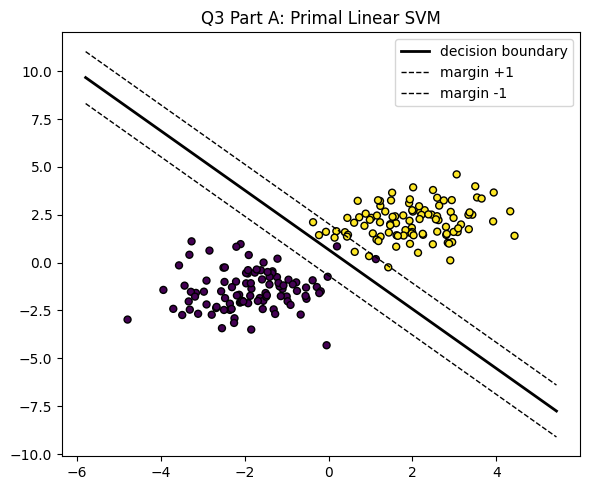

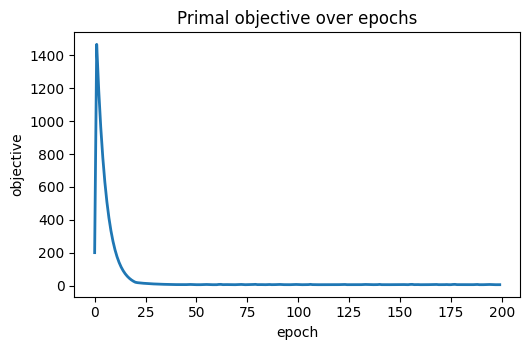

In [ ]:
X = np.asarray(X); y = np.asarray(y); w = np.asarray(w); b = float(b)
y_pred = sign_pm1(f_linear(X))
train_acc = accuracy_pm1(y, y_pred)
w_norm = np.linalg.norm(w)
margin_est = 1.0 / (w_norm + 1e-12)

margins = compute_margins(w, b, X, y)
hinge_vals = hinge_values(margins)
viol_frac = float(np.mean(hinge_vals > 0.0))
support_like = float(np.mean(np.isclose(margins, 1.0, atol=1e-2)))  # proxy for SVs

print(f"Train acc: {train_acc:.3f} (target ≥ 0.95)")
print(f"||w||: {w_norm:.4f}")
print(f"Approx. margin (1/||w||): {margin_est:.4f}")
print(f"Violation fraction (y*f(x) < 1): {viol_frac:.3f}")
print(f"~Support-like fraction (|y*f(x)-1| < 1e-2): {support_like:.3f}")

def plot_linear_boundary_and_margins(w, b, X, y, title="Q3 Part A: Primal Linear SVM"):
    """Plot decision boundary (f(x)=0) and margin lines (f(x)=±1)."""
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    xs = np.linspace(x_min, x_max, 400)

    plt.figure(figsize=(6, 5))
    if abs(w[1]) < 1e-12:
        x0 = -b / (w[0] + 1e-12)
        plt.axvline(x0, lw=2, label='decision boundary')
        plt.axvline(x0 - 1.0/(w[0]+1e-12), lw=1, ls='--', label='margin +1')
        plt.axvline(x0 + 1.0/(w[0]+1e-12), lw=1, ls='--', label='margin -1')
    else:
        yy = -(w[0]/w[1]) * xs - b / (w[1] + 1e-12)
        yy_m1 = -(w[0]/w[1]) * xs - (b - 1.0) / (w[1] + 1e-12)  # f(x)=+1
        yy_p1 = -(w[0]/w[1]) * xs - (b + 1.0) / (w[1] + 1e-12)  # f(x)=-1
        plt.plot(xs, yy, 'k-', lw=2, label='decision boundary')
        plt.plot(xs, yy_m1, 'k--', lw=1, label='margin +1')
        plt.plot(xs, yy_p1, 'k--', lw=1, label='margin -1')

    plt.scatter(X[:, 0], X[:, 1], c=(y > 0), s=25, edgecolors='k')
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

plot_linear_boundary_and_margins(w, b, X, y)

plt.figure(figsize=(5.4, 3.6))
plt.plot(hist["obj"], lw=2)
plt.xlabel("epoch")
plt.ylabel("objective")
plt.title("Primal objective over epochs")
plt.tight_layout()
plt.show()


## **Part B — Dual + Kernelized SVM (Projected Gradient Descent)**

### Problem Statement
In this part, you will implement a **kernelized soft-margin SVM** in the **dual formulation**, and train it with your **own optimizer** using **Projected Gradient Ascent (PGD)** under the dual constraints:  
- Box constraints: $0 \le \alpha_i \le C$  
- Equality constraint: $\sum_i \alpha_i y_i = 0$  

The dual objective is:
$
\max_{\alpha \in \mathbb{R}^n}
\quad
\underbrace{\mathbf{1}^\top \alpha}_{\text{linear}}
\;-\;
\frac{1}{2}\,\alpha^\top (YKY)\,\alpha
\quad\text{s.t.}\quad
\sum_i \alpha_i y_i = 0,\;\; 0 \le \alpha_i \le C,
$
where $Y=\mathrm{diag}(y)$ and $K_{ij}=K(x_i,x_j)$.  
Implement **linear**, **RBF** and **poly** kernels.

You will:
- Generate a nonlinearly separable dataset (e.g., `make_moons`), split into train/test.  
- Implement the **kernel matrix**, **dual gradient**, and **projections** (box + equality).  
- Train with PGD and recover the bias $b$ from support vectors.  
- Visualize the **decision boundary** and highlight **support vectors**, and report test accuracy.  

---

### Instructions
1. Implement kernels (`linear`, `rbf`, `poly`) and build the kernel matrix $K$.  
2. Implement the dual gradient $g(\alpha) = \mathbf{1} - (YKY)\alpha$.  
3. Implement projections:  
   - **Box** projection to $[0,C]^n$  
   - **Equality** projection to $\{\alpha:\sum_i \alpha_i y_i = 0\}$ via subtracting the component along $y$  
4. Train with PGD; log the dual objective value over iterations.  
5. Recover $b$ using any $i$ with $0<\alpha_i<C$:  
   $b = y_i - \sum_j \alpha_j y_j K_{ji}$  
   (average if multiple).  
6. Visualize the decision boundary and support vectors; report test accuracy.  
   - (Feasibility diagnostics like equality residual $|\sum_i \alpha_i y_i|$ and KKT residual will be printed for **sanity check only**, not graded.)  

---

**Grading (8 pts):**
- Correct implementation of **kernels, dual gradient, and projections** (3 pts)  
- PGD training that achieves **≥ 90% test accuracy** on the provided dataset (3 pts)  
- Correct recovery of bias $b$ and **clear decision boundary visualization** with highlighted support vectors (1 pt)  
- Dual objective curve plotted over iterations (1 pt)  

---

⚠️Note: You do **not** need to solve the full quadratic program (QP) with a generic solver. Instead, you will implement a simplified **Projected Gradient Ascent** optimizer for the dual problem.  


In [ ]:
# Part B — Dual + Kernelized SVM with PGD

from sklearn.datasets import make_moons  # allowed for data generation only

def sign_pm1(z):
    s = np.sign(z)
    s[s == 0] = 1
    return s

def accuracy_pm1(y_true, y_pred):
    return np.mean(y_true == y_pred)


Xb, yb01 = make_moons(n_samples=200, noise=0.20, random_state=0)
yb = np.where(yb01 == 0, -1, 1).astype(float)

perm = np.random.default_rng(0).permutation(len(Xb))
train_n = int(0.8 * len(Xb))
tr, te = perm[:train_n], perm[train_n:]
Xtr, ytr = Xb[tr], yb[tr]
Xte, yte = Xb[te], yb[te]


def kernel(X, Z, kind="rbf", gamma=1.5, degree=3):

    if kind == "linear":
        # TODO: Implement the linear kernel K(X,Z) = X @ Z^T
        return X @ Z.T
    elif kind == "rbf":
        # TODO: Implement the RBF kernel K_ij = exp(-gamma * ||x_i - z_j||^2)
        return np.exp(-gamma * np.linalg.norm(X[:,None,:] - Z[None,:,:], axis=-1)**2)
    elif kind == "poly":
        # TODO: Implement the polynomial kernel K(X,Z) = (1 + X @ Z^T)^degree
        return (1 + X @ Z.T)**degree

C_dual = 1.0
ker = "rbf"
gamma = 1.5
degree = 3


Ktr = kernel(Xtr, Xtr, kind=ker, gamma=gamma, degree=degree)
Y = np.diag(ytr)


def dual_objective(alpha, Y, K):

    # TODO: Implement computation of Y K Y α correctly
    # Hint: D(alpha) = 1^T alpha - 0.5 * alpha^T (Y  K Y) alpha
    alpha = np.asarray(alpha).ravel()
    if Y.ndim == 2:
        y = np.diag(Y).ravel()
    else:
        y = np.asarray(Y).ravel()

    ya = y * alpha                 # (n,)
    Qalpha = y * (K @ ya)          # (n,)
    # D(α) = 1^T α - 0.5 α^T (YKY) α
    return np.sum(alpha) - 0.5 * (alpha @ Qalpha)

def dual_grad(alpha, Y, K):
    # TODO: Implement gradient based on the dual objective
    # 相容 y 或 diag(y)
    alpha = np.asarray(alpha).ravel()
    if np.ndim(Y) == 2:
        y = np.diag(Y).ravel()
    else:
        y = np.asarray(Y).ravel()

    ya = y * alpha                 # (n,)
    # ∇D = 1 - (YKY)α = 1 - y ⊙ (K @ (y ⊙ α))
    return 1.0 - (y * (K @ ya))    # (n,)

def project_box(alpha, C):
    # TODO: Use np.clip to enforce the constraints
    return np.clip(alpha, 0.0, C)

def project_equality(alpha, y):
    # TODO: Subtract the component of α along y
    alpha = np.asarray(alpha).ravel()
    y = np.asarray(y).ravel()
    r = float(y @ alpha)                 # y^T α
    denom = float(y @ y) + 1e-12         # ||y||^2；對 ±1 標籤就是 n
    return alpha - (r / denom) * y


def solve_dual_pgd(K, y, C=1.0, iters=3000, lr=0.01, log_every=50):
    # Projected Gradient Ascent (PGD) for the dual problem.

    n = len(y)
    alpha = np.zeros(n)
    hist = {"obj": [], "eq_resid": []}

    for t in range(iters):
        # TODO: Use dual_grad to compute the gradient
        g = dual_grad(alpha, y, K)

        alpha = alpha + lr * g
        alpha = project_box(alpha, C)
        alpha = project_equality(alpha, y)

        if (t % log_every == 0) or (t == iters - 1):
            obj = dual_objective(alpha, np.diag(y), K)
            hist["obj"].append(float(obj))
            hist["eq_resid"].append(float(abs(y @ alpha)))

        # TODO: Add a stopping criterion (e.g. when dual objective converges)
            if prev_obj is not None and abs(obj - prev_obj) < 1e-5:
                break
            prev_obj = obj
    # Final clean-up projection
    alpha = project_box(alpha, C)
    alpha = project_equality(alpha, y)

    return alpha, hist




def recover_b(alpha, y, K, C, eps=1e-6):
    # TODO: Implement averaging scheme using support vectors (0 < α_i < C)
    # TODO: Add fallback to pick near-margin points if no valid SVs found
    # TODO: Compute b as the average of y_i - sum_j alpha_j y_j K(x_j, x_i)
    alpha = np.asarray(alpha).ravel()
    y = np.asarray(y).ravel()
    coef = alpha * y                 # β = α ⊙ y, shape (n,)

    f = K @ coef                    # f_i = Σ_j α_j y_j K(x_i, x_j)

    # 1) free support vectors
    sv_mask = (alpha > eps) & (alpha < C - eps)
    if np.any(sv_mask):
        b_vals = y[sv_mask] - f[sv_mask]   # b_i = y_i - f_i
        return float(np.mean(b_vals))

    # 2) fallback：選接近 margin 的點
    margins = y * f
    dist = np.abs(1.0 - margins)
    k = min(10, len(y))             # 取前 10 個（可調）
    idx = np.argsort(dist)[:k]
    if k > 0:
        b_vals = y[idx] - f[idx]
        return float(np.mean(b_vals))

    # 3) 極端狀況（理論上很少）
    return 0.0

def f_dual(Xnew):
    K_test = kernel(Xnew, Xsv, kind=ker, gamma=gamma, degree=degree)
    return K_test @ coef + b_dual


⚠️ **Do not modify this cell** — any changes will result in a score of **0** for Part B.



In [ ]:
alpha, hist_dual = solve_dual_pgd(
    Ktr, ytr,
    C=C_dual,
    iters=3000,
    lr=0.01,
    log_every=10
)

b_dual = recover_b(alpha, ytr, Ktr, C_dual)

sv = np.where(alpha > 1e-6)[0]
Xsv = Xtr[sv]
coef = alpha[sv] * ytr[sv]


Xtr = np.asarray(Xtr); ytr = np.asarray(ytr)
Xte = np.asarray(Xte); yte = np.asarray(yte)
alpha = np.asarray(alpha); b_dual = float(b_dual)

y_pred_te = sign_pm1(f_dual(Xte))
test_acc = accuracy_pm1(yte, y_pred_te)

eq_resid = abs(np.sum(alpha * ytr))

# KKT residual on training set
f_tr = f_dual(Xtr)
yf = ytr * f_tr
C = float(1.0)
tol = 1e-3
viol = []
for i in range(len(ytr)):
    if alpha[i] < tol:
        viol.append(max(0.0, 1.0 - yf[i]))
    elif alpha[i] > C - tol:
        viol.append(max(0.0, yf[i] - 1.0))
    else:
        viol.append(abs(1.0 - yf[i]))
kkt_max = float(np.max(viol)) if len(viol) else float("nan")

sv_count = int(np.sum(alpha > 1e-6))

print(f"Test acc: {test_acc:.3f} (target ≥ 0.90)")
print(f"Equality residual |Σ α_i y_i|: {eq_resid:.2e} (target ≤ 1e-3)")
print(f"KKT max residual: {kkt_max:.2e} (smaller is better)")
print(f"#Support Vectors: {sv_count}")

def plot_decision_boundary_with_sv(X, y, f_func, sv_idx, title="Q3 Part B: Dual+Kernel SVM"):
    pad = 0.5; h = 0.03
    x_min, x_max = X[:,0].min()-pad, X[:,0].max()+pad
    y_min, y_max = X[:,1].min()-pad, X[:,1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = f_func(grid).reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, zz > 0, alpha=0.30)
    plt.contour(xx, yy, zz, levels=[0], linewidths=2)
    plt.scatter(X[:,0], X[:,1], c=(y>0), s=25, edgecolors='k')
    plt.scatter(X[sv_idx,0], X[sv_idx,1], s=80, facecolors='none', edgecolors='r', linewidths=1.5, label='SV')
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

sv_idx = np.where(alpha > 1e-6)[0]
plot_decision_boundary_with_sv(Xtr, ytr, f_dual, sv_idx)

if "obj" in hist_dual and len(hist_dual["obj"]) > 0:
    plt.figure(figsize=(5.4,3.6))
    plt.plot(hist_dual["obj"], lw=2)
    plt.xlabel("logged step")
    plt.ylabel("dual objective")
    plt.title("Dual objective over iterations (PGD)")
    plt.tight_layout()
    plt.show()


UnboundLocalError: cannot access local variable 'prev_obj' where it is not associated with a value

## **Part C — Dual + Kernel C-SVM via SMO with Explicit KKT Checks**

### Problem Statement
In this part, you will implement a **soft-margin SVM** in the **dual formulation** using **SMO (Sequential Minimal Optimization)** with **explicit KKT checks**. You will update two Lagrange multipliers ($\alpha_i$, $\alpha_j$) per step while enforcing the dual constraints.

- **Box constraints**
$$
0 \le \alpha_k \le C \quad (\forall k).
$$

- **Equality constraint**
$$
\sum_{k=1}^{n} \alpha_k\, y_k \;=\; 0.
$$

The **dual objective** is
$$
\max_{\boldsymbol{\alpha}\in\mathbb{R}^n}\;
\mathbf{1}^\top \boldsymbol{\alpha}
\;-\;
\frac{1}{2}\,\boldsymbol{\alpha}^\top (YKY)\,\boldsymbol{\alpha}
\quad\text{s.t.}\quad
y^\top \boldsymbol{\alpha}=0,\;\; 0\le \alpha_i \le C \;(\forall i),
$$
where $Y=\operatorname{diag}(y)$ and $K_{ij}=K(x_i,x_j)$.  
You will implement **linear, RBF, and polynomial** kernels (all supported in the kernel function).

---

### Explicit KKT checks
For each sample $i$, define
$$
f_i = \sum_{j=1}^{n} \alpha_j\, y_j\, K(x_j,x_i) + b,
\qquad
y_i f_i.
$$

The **KKT violation** for sample \(i\) is
$$
v_i =
\begin{cases}
\max(0,\; 1 - y_i f_i), & \alpha_i = 0,\\[6pt]
|1 - y_i f_i|, & 0 < \alpha_i < C,\\[6pt]
\max(0,\; y_i f_i - 1), & \alpha_i = C.
\end{cases}
$$

We will:
- **Select the working set** using the largest KKT violators (two-phase: first among indices with `0 < alpha_i < C`, then among all indices).
- **Stop** when the **max KKT violation**
$$
v_{\max} = \max_i v_i \le \text{tol},
$$
e.g., `tol = 1e-3`.
- Maintain an **error cache** $E_k = f(x_k) - y_k$ and update it incrementally.
- Track optional diagnostics: **duality gap** \(P-D\), equality residual $|y^\top \alpha|$, and KKT violation curve.

---

### Instructions
1. Implement the **kernel function** (`linear`, `rbf`, `poly`).  
2. Implement `kkt_violations(alpha, y, K, b, C)` and use **max violation** as the stopping rule.  
3. Implement `take_step(i, j)`:
   - compute bounds `(L, H)`,
   - curvature $eta = K_{ii} + K_{jj} - 2K_{ij}$,
   - update $\alpha_j$ (clip to `[L, H]`), then $\alpha_i$,
   - update the bias using the `b1 / b2` rules.
4. Implement `examine_example(i)`:
   - check the KKT condition at index `i`,
   - if violated, choose `j` (e.g., maximize $|E_i - E_j|$) and call `take_step(i, j)`.
5. Use a **two-phase scan**: first over indices with $0 < \alpha_i < C$; if none violates KKT above `tol`, scan all indices.
6. Maintain and update the **error cache** `E` incrementally.
7. Report: test accuracy, equality residual, max KKT violation, and (optional) duality gap.
8. Visualize the decision boundary and highlight support vectors.

---

### Note
- You are **not** asked to solve the general quadratic program with a solver.  
- Instead, implement SMO updates with explicit KKT checks.  
- Diagnostics (KKT violation, equality residual, duality gap) are for **sanity check**, not grading.

---

**Grading (8 pts)**
- Correct implementation of kernels, SMO update (`take_step`, `examine_example`), and KKT violation check (5 pts)  
- Training with SMO that achieves ≥ 90% test accuracy on the provided dataset (2 pts)  
- Clear visualization of the decision boundary with support vectors, and reporting diagnostics (1 pt)  


In [ ]:
# Part C — Dual + Kernel C-SVM via SMO with Explicit KKT

from sklearn.datasets import make_moons
Xb, yb01 = make_moons(n_samples=200, noise=0.20, random_state=0)
yb = np.where(yb01 == 0, -1, 1).astype(float)
perm = np.random.default_rng(0).permutation(len(Xb))
n_tr = int(0.8 * len(Xb))
tr, te = perm[:n_tr], perm[n_tr:]
Xtr, ytr = Xb[tr], yb[tr]
Xte, yte = Xb[te], yb[te]

# Hint: you can just copy from Part B
def _default_kernel(X, Z, kind="rbf", gamma=5.0, degree=3):
    if kind == "linear":
        # TODO: Implement the linear kernel K(X,Z) = X @ Z^T

    elif kind == "rbf":
        # TODO: Implement the RBF kernel K_ij = exp(-gamma * ||x_i - z_j||^2)

    elif kind == "poly":
        # TODO: (Optional extension) Implement the polynomial kernel


kernel = globals().get("kernel", _default_kernel)
ker = globals().get("ker", "rbf")
gamma = float(globals().get("gamma", 5.0))
degree = int(globals().get("degree", 3))

def kernel_smo(X, Z):
    return kernel(X, Z, kind=ker, gamma=gamma, degree=degree)

K_smo = kernel_smo(Xtr, Xtr)

def sign_pm1(z):
    s = np.sign(z); s[s==0] = 1; return s

def dual_objective(alpha, y, K):
    # TODO: Implement dual objective D(alpha) = 1^T alpha - 0.5 * alpha^T (YKY) alpha


def primal_objective(alpha, y, K, b, C):
    # TODO: Implement primal objective P = 0.5||w||^2 + C Σ hinge(1 - y f)


def dual_objective(alpha, y, K):
    # TODO: Implement dual objective D(alpha) = 1^T alpha - 0.5 * alpha^T (YKY) alpha

def primal_objective(alpha, y, K, b, C):
    # TODO: Implement primal objective P = 0.5||w||^2 + C Σ hinge(1 - y f)




def kkt_violations(alpha, y, K, b, C, eps=1e-6):

    # TODO: Implement KKT violation check for alpha=0, 0<alpha<C, alpha=C


class SMO_KKT:
    def __init__(self, C=1.0, tol_kkt=1e-3, eps=1e-6, max_passes=10, max_outer=20000):
        self.C = float(C)
        self.tol_kkt = float(tol_kkt)
        self.eps = float(eps)
        self.max_passes = int(max_passes)
        self.max_outer = int(max_outer)
        self.hist = {"kkt_max": [], "dual": [], "gap": [], "eq_resid": []}

    def fit(self, X, y, K):
        n = len(y)
        self.X = X
        self.y = y.astype(float)
        self.K = K
        self.alpha = np.zeros(n)
        self.b = 0.0


        E = -self.y.copy()

        passes_without_change = 0
        outer = 0
        while outer < self.max_outer:
            v, vmax = kkt_violations(self.alpha, self.y, self.K, self.b, self.C, eps=self.eps)
            self.hist["kkt_max"].append(vmax)
            self.hist["dual"].append(dual_objective(self.alpha, self.y, self.K))
            P = primal_objective(self.alpha, self.y, self.K, self.b, self.C)
            D = self.hist["dual"][-1]
            self.hist["gap"].append(P - D)
            self.hist["eq_resid"].append(abs(float((self.alpha * self.y).sum())))

            if vmax <= self.tol_kkt:
                break

            num_changed = 0
            # TODO: Phase 1: try choosing i from free support vectors
            # Hint: Select i among free SVs (0 < alpha_i < C) with largest violation
            # Hint: Select j using heuristic (maximize |E_i - E_j|)
            # Hint: Attempt SMO step (update alpha_i, alpha_j, b, error cache)

            # TODO: fallback if no progress
            # Hint: If Phase 1 makes no progress, choose i with largest violation among all indices
            # Hint: Again select j and attempt SMO step
            # Hint: Update passes_without_change (if no alpha updated, increment; else reset)
            # Hint: Break if passes_without_change >= max_passes


            outer += 1
        return self

    def _f_i(self, i):
        return (self.alpha * self.y) @ self.K[:, i] + self.b

    def _select_j(self, i, E):
        # TODO: Implement heuristic to select j maximizing |E_i - E_j|


    def _dual_obj_after_update(self, a1_new, a2_new, i, j):
        alpha_tmp = self.alpha.copy()
        alpha_tmp[i] = a1_new
        alpha_tmp[j] = a2_new
        return dual_objective(alpha_tmp, self.y, self.K)

    def _take_step(self, i, j, E):
        if i == j:
            return False

        # TODO: Implement SMO step (bounds L/H, eta, update a2, a1, bias, error cache)


        # Bounds L, H
        if y1 != y2:
            L = max(0.0, a2_old - a1_old)
            H = min(self.C, self.C + a2_old - a1_old)
        else:
            L = max(0.0, a1_old + a2_old - self.C)
            H = min(self.C, a1_old + a2_old)
        if L == H: return False

        f1 = self._f_i(i); f2 = self._f_i(j)
        E1, E2 = f1 - y1, f2 - y2
        eta = K11 + K22 - 2.0 * K12

        if eta > 0:
            a2_new = a2_old + y2 * (E1 - E2) / eta
            a2_new = float(np.clip(a2_new, L, H))
        else:
            a2_L = float(L)
            a2_H = float(H)
            a1_L = a1_old + y1 * y2 * (a2_old - a2_L)
            a1_H = a1_old + y1 * y2 * (a2_old - a2_H)
            D_L = self._dual_obj_after_update(a1_L, a2_L, i, j)
            D_H = self._dual_obj_after_update(a1_H, a2_H, i, j)
            if (D_L <= dual_objective(self.alpha, self.y, self.K)) and (D_H <= dual_objective(self.alpha, self.y, self.K)):
                return False
            a2_new = a2_L if D_L > D_H else a2_H

        if abs(a2_new - a2_old) < self.eps * (a2_new + a2_old + self.eps):
            return False

        a1_new = a1_old + y1 * y2 * (a2_old - a2_new)

        b_old = self.b
        b1 = self.b - E1 - y1*(a1_new - a1_old)*K11 - y2*(a2_new - a2_old)*K12
        b2 = self.b - E2 - y1*(a1_new - a1_old)*K12 - y2*(a2_new - a2_old)*K22
        if 0.0 < a1_new < self.C:
            b_new = b1
        elif 0.0 < a2_new < self.C:
            b_new = b2
        else:
            b_new = 0.5 * (b1 + b2)

        self.alpha[i] = a1_new
        self.alpha[j] = a2_new
        self.b = b_new

        d1, d2 = (a1_new - a1_old), (a2_new - a2_old)
        # TODO: Update error cache E incrementally


        return True

    def decision_function(self, Xnew):
        sv = self.alpha > 1e-6
        coef = self.alpha[sv] * self.y[sv]
        K_test = kernel_smo(Xnew, self.X[sv])
        return K_test @ coef + self.b

    def predict(self, Xnew):
        return sign_pm1(self.decision_function(Xnew))

# Hyperparams
C_smo = 10.0
tol_kkt = 1e-3
eps = 1e-6
max_passes = 10
max_outer = 5000

smo = SMO_KKT(C=C_smo, tol_kkt=tol_kkt, eps=eps,
              max_passes=max_passes, max_outer=max_outer).fit(Xtr, ytr, K_smo)

alpha_smo = smo.alpha.copy()
b_smo = float(smo.b)
hist_smo = smo.hist

def f_smo(Xnew):
    return smo.decision_function(Xnew)


This cell evaluates and visualizes your **SMO with explicit KKT checks**.

⚠️ **Do not modify this cell** — any changes will result in a score of **0** for Part C.

**This cell will:**
- Report **test accuracy**, the equality residual $|\sum_i \alpha_i y_i|$, the **max KKT violation**, and the **duality gap** (optional diagnostic).
- Plot the **decision boundary** with **support vectors**.
- Plot the **max KKT violation** and the **dual objective** over iterations.


In [ ]:

Xtr = np.asarray(Xtr); ytr = np.asarray(ytr)
Xte = np.asarray(Xte); yte = np.asarray(yte)
alpha = np.asarray(alpha_smo); b = float(b_smo)
C = float(C_smo)

def sign_pm1(z):
    s = np.sign(z); s[s==0] = 1; return s
def accuracy_pm1(y_true,y_pred):
    return np.mean(y_true == y_pred)

y_pred_te = sign_pm1(f_smo(Xte))
test_acc = accuracy_pm1(yte, y_pred_te)

eq_resid = abs(float(np.sum(alpha * ytr)))


def _kkt_violations_local(alpha, y, K, b, C, eps=1e-6):
    f = K @ (alpha * y) + b
    yf = y * f
    v = np.zeros_like(alpha)
    low  = alpha <= eps
    mid  = (alpha > eps) & (alpha < C - eps)
    high = alpha >= C - eps
    v[low]  = np.maximum(0.0, 1.0 - yf[low])
    v[mid]  = np.abs(1.0 - yf[mid])
    v[high] = np.maximum(0.0, yf[high] - 1.0)
    return v, float(np.max(v))

_, kkt_max = _kkt_violations_local(alpha, ytr, K_smo, b, C, eps=1e-6)




D = dual_objective(alpha, ytr, K_smo)
P = primal_objective(alpha, ytr, K_smo, b, C)
gap = P - D

print(f"SMO (KKT) Test acc: {test_acc:.3f} (target ≥ 0.90)")
print(f"Equality residual |Σ α_i y_i|: {eq_resid:.2e} (target ≤ 1e-3)")
print(f"KKT max violation (diagnostic): {kkt_max:.2e} (smaller is better)")
print(f"Duality gap P−D (diagnostic): {gap:.2e} (smaller is better)")

def plot_decision_boundary_with_sv(X, y, f_func, alpha, title="Q3 Part C: SMO (KKT)"):
    pad = 0.5; h = 0.03
    x_min, x_max = X[:,0].min()-pad, X[:,0].max()+pad
    y_min, y_max = X[:,1].min()-pad, X[:,1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = f_func(grid).reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, zz > 0, alpha=0.30)
    cs = plt.contour(xx, yy, zz, levels=[0], linewidths=2)
    plt.clabel(cs, inline=True, fmt={0:"f(x)=0"})
    plt.scatter(X[:,0], X[:,1], c=(y>0), s=25, edgecolors='k')
    sv_idx = np.where(alpha > 1e-6)[0]  # SV threshold
    plt.scatter(X[sv_idx,0], X[sv_idx,1],
                s=80, facecolors='none', edgecolors='r', linewidths=1.5, label='SV')
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

plot_decision_boundary_with_sv(Xtr, ytr, f_smo, alpha)


if isinstance(hist_smo, dict) and ("kkt_max" in hist_smo or "dual" in hist_smo):
    if "kkt_max" in hist_smo and len(hist_smo["kkt_max"]) > 0:
        plt.figure(figsize=(5.4,3.6))
        plt.plot(hist_smo["kkt_max"], lw=2)
        plt.xlabel("outer iteration")
        plt.ylabel("max KKT violation")
        plt.title("Max KKT violation over iterations")
        plt.tight_layout()
        plt.show()

    if "dual" in hist_smo and len(hist_smo["dual"]) > 0:
        plt.figure(figsize=(5.4,3.6))
        plt.plot(hist_smo["dual"], lw=2)
        plt.xlabel("outer iteration")
        plt.ylabel("dual objective")
        plt.title("Dual objective over iterations")
        plt.tight_layout()
        plt.show()



### **Questions (3 pts total, 1 pt each)**

1. Why does maximizing the margin in SVMs generally improve generalization performance?  
**Answer:**  

2. What is the role of the regularization parameter $C$ in SVMs, and how does it affect the trade-off between margin size and classification errors?  
**Answer:**  

3. In the RBF kernel, what effect does the parameter $\gamma$ have on the decision boundary? What might happen if $\gamma$ is set too large or too small?  
**Answer:**  


# **Q4: Tree-based Models (CART and Ensembles)**

### Problem Statement
In this question, you will implement **tree-based models** from scratch, focusing on the **CART algorithm (Classification and Regression Trees)** and its extensions.  
Decision trees can capture non-linear relationships but are prone to **overfitting**. To address this, you will explore **pruning** and **ensemble methods (Random Forests)** to improve generalization. You will also implement **feature importance** measures and compare against baseline models.

### Deliverables
- **Code:** CART (classification + regression), pruning, Random Forest (bagging + feature subsampling + OOB error), feature importance.  
- **Figures:** decision boundaries, regression curves, pre-/post-pruning comparison, OOB vs test error, error vs n_estimators, feature importance charts.  
- **Report:** short answers discussing impurity vs accuracy, bias–variance tradeoff, pruning effects, why Random Forests reduce variance, OOB vs test error, and feature importance definitions.  

### Constraints
- Use **NumPy + Matplotlib** only.  
- Do not use built-in decision tree, pruning, random forest, or feature importance utilities.  
- **sklearn** may be used only for dataset generation and baseline models.  

**Grading**: This question is worth **25 points total**.

## **Part A — Unified CART (Classification & Regression)**

### Problem Statement
In this part, you will implement a **Decision Tree (CART)** from scratch that supports both **classification** and **regression**.

- **Classification dataset:** 2D nonlinear data (e.g., moons).  
- **Regression dataset:** 1D nonlinear function $y = \sin(x) + \epsilon$, with $\epsilon \sim \mathcal{N}(0,\sigma^2)$ (Gaussian noise).

Your implementation must:
- Use **Gini impurity** for classification and **MSE** for regression.  
- Build trees recursively with **binary splits** and **stopping criteria**.  
- Predict by **majority vote** (classification) or **leaf mean** (regression).  
- Visualize the **decision boundary** (classification) and **regression curve** (regression).  
- Compare with baselines: logistic regression (classification), linear regression (regression).  

### Instructions
1. Implement a unified `DecisionTree` that supports both classification and regression.  
2. Implement impurity functions for **Gini impurity** (classification) and **MSE** (regression). Use impurity decrease \(\Delta(t)\) to decide the best splits.  
3. Build the tree recursively using binary splits, with stopping criteria based on:
   - `max_depth`: Limits how deep the tree can grow. Prevents the model from becoming too complex and overfitting.
   - `min_samples_split`: Minimum samples required to make a further split; helps prevent splitting when there are not enough data points.
   - `min_samples_leaf`: Minimum samples required at the leaf node; helps avoid overly fine subdivisions.
4. Predict using the **majority class** for classification tasks or the **mean value** for regression tasks.  
5. Train your model on the datasets, and visualize the **decision boundary** for classification and the **regression curve** for regression.  
6. Compare your tree-based model with the **baseline models** (logistic regression for classification and linear regression for regression).  
7. Discuss the **bias–variance** tradeoff between shallow vs. deep trees:
   - **Shallow trees** (with smaller `max_depth`) tend to have **high bias** but **low variance**, underfitting the data.
   - **Deep trees** (with large `max_depth`) can capture complex patterns, leading to **low bias** but **high variance**, which might overfit the data.
   - The optimal tree depth balances bias and variance.

**Grading (6 pts)**

- Classification (3 pts):
  - A depth=3 CART achieves test accuracy ≥ 0.90 and is no worse than the logistic regression baseline. (2 pts)

  - Clear decision boundary plot showing the separation. (1 pt)

- Regression (3 pts):

  - CART achieves test MSE < 0.10 and is lower than the linear regression baseline. (2 pts)

  - Clear regression curve plot showing the fit. (1 pt)

In [ ]:
from dataclasses import dataclass
from typing import Optional, Tuple, Any, List, Tuple, Callable, Dict

# Allowed ONLY for data & baselines (NOT for trees/pruning/importance)
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error


In [ ]:
# Part A: Unified CART (Classification & Regression)

def gini_impurity(y: np.ndarray) -> float:

    # TODO: Handle len(y) == 0 -> return 0.0
    # TODO: Count class frequencies using np.bincount
    # TODO: Convert counts to probabilities
    # TODO: Return 1 - sum(p_k^2)



def node_mse(y: np.ndarray) -> float:

    # TODO: Handle len(y) == 0 -> return 0.0
    # TODO: Compute population variance with ddof=0



class DecisionTree:
    """
    Minimal CART for Part A:
      - task: 'classification' | 'regression'
      - criterion: Gini (classification) | variance/MSE (regression)
      - binary splits with stopping rules
      - leaf prediction: majority vote (classification) | mean (regression)
    """
    def __init__(
        self,
        max_depth: Optional[int] = None,
        min_samples_split: int = 2,
        min_samples_leaf: int = 1,
        task: str = 'classification'
    ):
        assert task in ('classification', 'regression')
        self.max_depth = max_depth
        self.min_samples_split = int(min_samples_split)
        self.min_samples_leaf = int(min_samples_leaf)
        self.task = task
        self.tree_: Optional[Dict[str, Any]] = None
        self.n_features_: Optional[int] = None
        self.classes_ = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        X = np.asarray(X)
        y = np.asarray(y)
        self.n_features_ = X.shape[1]

        # TODO: For classification, encode labels into integers 0..K-1 if not already


        self.tree_ = self._build_tree(X, y, depth=0)

    def predict(self, X: np.ndarray) -> np.ndarray:

        if self.tree_ is None:
            raise RuntimeError("Model is not fitted.")
        X = np.asarray(X)
        preds = np.array([self._predict_one(x, self.tree_) for x in X])
        return preds

    def _build_tree(self, X: np.ndarray, y: np.ndarray, depth: int) -> Dict[str, Any]:
        """Recursively build the CART."""
        n = X.shape[0]
        max_depth = np.inf if self.max_depth is None else self.max_depth

        # TODO: Stop if classification node is pure
        # TODO: Stop if depth >= max_depth

        split = self._best_split(X, y)
        # TODO: Stop if not enough samples to split


        j, thr = split["feature"], split["threshold"]
        left_mask = X[:, j] <= thr
        right_mask = ~left_mask

        # TODO: Enforce min_samples_leaf for both children


        left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            "type": "split",
            "feature": j,
            "threshold": float(thr),
            "left": left,
            "right": right
        }

    def _best_split(self, X: np.ndarray, y: np.ndarray) -> Optional[Dict[str, float]]:

        n, d = X.shape
        parent_imp = self._node_impurity(y)
        best_gain = -np.inf
        best = None

        # TODO: Generate candidate thresholds as midpoints between sorted unique feature values
        # TODO: Skip splits that violate min_samples_leaf
        # TODO: Compute impurity decrease for each split
        # TODO: Return the split with the largest gain



    def _node_impurity(self, y: np.ndarray) -> float:
        if self.task == 'classification':
            return gini_impurity(y)
        else:
            return node_mse(y)

    def _make_leaf(self, y: np.ndarray) -> Dict[str, Any]:
        if self.task == 'classification':
            counts = np.bincount(y)
            value = int(np.argmax(counts))
        else:
            value = float(np.mean(y))
        return {"type": "leaf", "value": value}

    def _predict_one(self, x: np.ndarray, node: Dict[str, Any]):
        while node["type"] != "leaf":
            j = node["feature"]
            thr = node["threshold"]
            node = node["left"] if x[j] <= thr else node["right"]
        return node["value"]


⚠️ **Do not modify this cell** — any changes will result in a score of **0** for Part A.

In [ ]:
def plot_decision_boundary(X: np.ndarray, y: np.ndarray, model: DecisionTree) -> None:
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=35)
    plt.title("Decision Boundary (Classification)")
    plt.tight_layout()
    plt.show()


def plot_regression_curve(X: np.ndarray, y: np.ndarray, model: DecisionTree) -> None:
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    xs = np.linspace(x_min, x_max, 400).reshape(-1, 1)
    yhat = model.predict(xs)
    plt.scatter(X[:, 0], y, s=15, alpha=0.6, edgecolor='k')
    plt.plot(xs[:, 0], yhat, linewidth=2)
    plt.title("Regression Curve (CART)")
    plt.tight_layout()
    plt.show()

Xc, yc = make_moons(n_samples=300, noise=0.30, random_state=42)
Xc_tr, Xc_te, yc_tr, yc_te = train_test_split(Xc, yc, test_size=0.25, random_state=42)

tree_clf_shallow = DecisionTree(max_depth=3, task='classification')
tree_clf_shallow.fit(Xc_tr, yc_tr)
tree_clf_deep = DecisionTree(max_depth=10, task='classification')
tree_clf_deep.fit(Xc_tr, yc_tr)

yc_pred_sh = tree_clf_shallow.predict(Xc_te)
yc_pred_dp = tree_clf_deep.predict(Xc_te)
print(f"[Classification] depth=3  test acc = {accuracy_score(yc_te, yc_pred_sh):.3f}")
print(f"[Classification] depth=10 test acc = {accuracy_score(yc_te, yc_pred_dp):.3f}")

# Baseline: logistic regression (sklearn allowed for baseline)
logit = LogisticRegression().fit(Xc_tr, yc_tr)
yc_pred_lr = logit.predict(Xc_te)
print(f"[Classification] Logistic baseline acc = {accuracy_score(yc_te, yc_pred_lr):.3f}")

# Plot decision boundaries (train set for visualization)
plot_decision_boundary(Xc_tr, yc_tr, tree_clf_shallow)
plot_decision_boundary(Xc_tr, yc_tr, tree_clf_deep)

# Regression (y = sin(x) + noise)
rng = np.random.default_rng(42)
n = 300
Xr = rng.uniform(-3*np.pi/2, 3*np.pi/2, size=(n, 1))
yr = np.sin(Xr[:, 0]) + rng.normal(0, 0.2, size=n)
Xr_tr, Xr_te, yr_tr, yr_te = train_test_split(Xr, yr, test_size=0.25, random_state=42)

tree_reg = DecisionTree(max_depth=6, min_samples_leaf=5, task='regression')
tree_reg.fit(Xr_tr, yr_tr)
yr_pred = tree_reg.predict(Xr_te)
print(f"[Regression] CART test MSE = {mean_squared_error(yr_te, yr_pred):.4f}")

# Baseline: linear regression (sklearn allowed for baseline)
lin = LinearRegression().fit(Xr_tr, yr_tr)
yr_pred_lin = lin.predict(Xr_te)
print(f"[Regression] Linear baseline MSE = {mean_squared_error(yr_te, yr_pred_lin):.4f}")

# Plot regression curve on train set
plot_regression_curve(Xr_tr, yr_tr, tree_reg)


**Shallow vs Deep Tree Comparison**  
This visualization compares a shallow tree (depth=3) and a deep tree (depth=10) on the regression task.  
It is provided for qualitative understanding of **underfitting vs overfitting**, and is **not graded**.


In [ ]:

# Generate Regression Data: y = sin(x) + noise

rng = np.random.default_rng(42)
X_reg = np.linspace(-3.0, 3.0, 200).reshape(-1, 1)
y_reg = np.sin(X_reg[:, 0]) + rng.normal(0.0, 0.10, size=X_reg.shape[0])  # 1D target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)


# Train two trees (shallow vs deep)
tree_shallow = DecisionTree(max_depth=3, min_samples_leaf=3, task='regression')
tree_shallow.fit(X_train, y_train)

tree_deep = DecisionTree(max_depth=10, min_samples_leaf=1, task='regression')
tree_deep.fit(X_train, y_train)


# Evaluate (use 1D targets)
y_pred_sh = tree_shallow.predict(X_test)
y_pred_dp = tree_deep.predict(X_test)

print(f"Tree (depth=3)  Test MSE: {mean_squared_error(y_test, y_pred_sh):.4f}")
print(f"Tree (depth=10) Test MSE: {mean_squared_error(y_test, y_pred_dp):.4f}")


# Plot regression curve
xs = np.linspace(X_train.min() - 0.2, X_train.max() + 0.2, 400).reshape(-1, 1)
ys_sh = tree_shallow.predict(xs)
ys_dp = tree_deep.predict(xs)

plt.scatter(X_train[:, 0], y_train, s=18, alpha=0.6, edgecolor='k', label='Training data')
plt.plot(xs[:, 0], ys_sh, linewidth=2, label='Tree depth=3')
plt.plot(xs[:, 0], ys_dp, linewidth=2, label='Tree depth=10')
plt.title("Regression Curve: shallow vs deep tree")
plt.legend()
plt.tight_layout()
plt.show()


## **Part B — Pruning (Generalization of Trees)**

### Problem Statement
Decision trees tend to **overfit** when grown too deep. In this part, you will implement **pruning techniques** to improve generalization.

- **Pre-pruning**: handled via stopping rules (e.g., `max_depth`, `min_samples_split`, `min_samples_leaf`).
- **Post-pruning (Reduced-Error Pruning)**: starting from a fully-grown tree, traverse bottom-up and **replace subtrees with a single leaf** if doing so **improves validation performance**.

You will compare **unpruned** and **pruned** trees on both **classification** and **regression** datasets.

### Instructions
1. Split data into **train/validation/test** sets.
2. Train a **fully-grown** CART with minimal pre-pruning (large `max_depth`, small `min_samples_*`).
3. Implement **reduced-error post-pruning**:
   - Bottom-up traversal of the tree.
   - For each internal node, consider replacing its subtree with a **leaf** whose value is computed from **training samples that reach that node** (majority class for classification, mean for regression).
   - **Accept** the prune if validation performance **improves** (or **does not degrade**, per your policy).
4. Report and compare performance (accuracy for classification, MSE for regression) on the **test set**.
5. Visualize decision boundaries / regression curves **before vs after pruning**.
6. **Discuss** how pruning changes the **bias–variance** tradeoff.

**Constraints**: Use **NumPy + Matplotlib** only for tree/pruning. `sklearn` is allowed for dataset generation and metrics/baselines.

**Grading (8 pts):**  
- **Classification tree (4 pts):** Must implement reduced-error pruning. After pruning, training accuracy decreases while test accuracy increases, and the decision boundary plot clearly shows reduced complexity.  
- **Regression tree (4 pts):** Must implement reduced-error pruning. After pruning, training MSE increases while test MSE decreases, and the regression curve plot clearly shows reduced complexity.  


In [ ]:
class DecisionTreePrunable:
    """
    CART for Part B with stored node statistics for pruning:
      - task: 'classification' or 'regression'
      - Stores at each node:
          node_id, n_samples, value (leaf prediction if pruned),
          impurity (for info), and for classification class_counts.
    """
    def __init__(
        self,
        max_depth: Optional[int] = None,
        min_samples_split: int = 2,
        min_samples_leaf: int = 1,
        task: str = 'classification'
    ):
        assert task in ('classification', 'regression')
        self.max_depth = max_depth
        self.min_samples_split = int(min_samples_split)
        self.min_samples_leaf = int(min_samples_leaf)
        self.task = task

        self.tree_: Optional[Dict[str, Any]] = None
        self.n_features_: Optional[int] = None
        self._next_node_id = 0
        self.classes_ = None  # if labels need encoding

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Fit a CART with node stats stored for pruning."""
        X = np.asarray(X)
        y = np.asarray(y)
        self.n_features_ = X.shape[1]

        # TODO: For classification, encode labels into integers 0..K-1 if not already

        self.tree_ = self._build_tree(X, y, depth=0)

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self.tree_ is None:
            raise RuntimeError("Model is not fitted.")
        X = np.asarray(X)
        return np.array([self._predict_one(x, self.tree_) for x in X])

    def _new_node_id(self) -> int:
        nid = self._next_node_id
        self._next_node_id += 1
        return nid

    def _build_tree(self, X: np.ndarray, y: np.ndarray, depth: int) -> Dict[str, Any]:
        n = X.shape[0]
        max_depth = np.inf if self.max_depth is None else self.max_depth

        # Compute node summary stats (used if we prune this node)
        if self.task == 'classification':
            counts = np.bincount(y, minlength=max(1, y.max() + 1))
            value = int(np.argmax(counts))
            impurity = gini_impurity(y)
            node_stats = {"class_counts": counts}
        else:
            value = float(np.mean(y))
            impurity = node_mse(y)
            node_stats = {}


        # TODO: Stop if classification node is pure
        # TODO: Stop if depth >= max_depth
        split = self._best_split(X, y)
        # TODO: Stop if not enough samples to split


        j, thr = split["feature"], split["threshold"]
        left_mask = X[:, j] <= thr
        right_mask = ~left_mask

        # TODO: Enforce min_samples_leaf for both children



        left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        node = {
            "type": "split",
            "node_id": self._new_node_id(),
            "feature": j,
            "threshold": float(thr),
            "left": left,
            "right": right,
            "n_samples": int(n),
            "impurity": float(impurity),
            "value": value,     # value if this node is pruned to a leaf
            **node_stats
        }
        return node

    def _best_split(self, X: np.ndarray, y: np.ndarray) -> Optional[Dict[str, float]]:
        """
        Choose (feature, threshold) maximizing impurity decrease:
          ΔI = I(parent) - [ (nL/n) I(left) + (nR/n) I(right) ]
        """
        n, d = X.shape
        parent_imp = self._node_impurity(y)
        best_gain = -np.inf
        best = None

        # TODO: Generate candidate thresholds as midpoints between sorted unique feature values
        # TODO: Skip splits that violate min_samples_leaf
        # TODO: Compute impurity decrease for each split
        # TODO: Return the split with the largest gain


    def _node_impurity(self, y: np.ndarray) -> float:
        return gini_impurity(y) if self.task == 'classification' else node_mse(y)

    def _predict_one(self, x: np.ndarray, node: Dict[str, Any]):
        while node["type"] != "leaf":
            j, thr = node["feature"], node["threshold"]
            node = node["left"] if x[j] <= thr else node["right"]
        return node["value"]


# Reduced-Error Post-Pruning
def _route_indices(node: Dict[str, Any], X: np.ndarray, idxs: np.ndarray, out: Dict[int, np.ndarray]) -> None:
    out[node["node_id"]] = idxs
    if node["type"] == "split":
        j, thr = node["feature"], node["threshold"]
        left_mask = X[idxs, j] <= thr
        left_idxs = idxs[left_mask]
        right_idxs = idxs[~left_mask]
        _route_indices(node["left"], X, left_idxs, out)
        _route_indices(node["right"], X, right_idxs, out)

def _score(task: str, y_true: np.ndarray, y_pred: np.ndarray) -> float:
    if task == 'classification':
        return float(np.mean(y_true == y_pred))
    else:
        return -float(np.mean((y_true - y_pred) ** 2))

def _predict_with_subtree(node: Dict[str, Any], X: np.ndarray) -> np.ndarray:
    preds = np.empty(X.shape[0], dtype=float)
    for i in range(X.shape[0]):
        cur = node
        while cur["type"] != "leaf":
            j, thr = cur["feature"], cur["threshold"]
            cur = cur["left"] if X[i, j] <= thr else cur["right"]
        preds[i] = cur["value"]
    return preds

def _predict_as_leaf(node: Dict[str, Any], task: str, n: int) -> np.ndarray:
    val = node["value"]
    if task == 'classification':
        return np.full(n, int(val), dtype=int)
    else:
        return np.full(n, float(val), dtype=float)


def prune_reduced_error(
    tree: DecisionTreePrunable,
    X_val: np.ndarray,
    y_val: np.ndarray,
    accept_on_tie: bool = True
) -> int:
    if tree.tree_ is None:
        raise RuntimeError("Tree is not fitted.")

    X_val = np.asarray(X_val)
    y_val = np.asarray(y_val)

    # Route validation samples to each node
    node_to_val_idxs: Dict[int, np.ndarray] = {}
    _route_indices(tree.tree_, X_val, np.arange(X_val.shape[0]), node_to_val_idxs)

    pruned_count = 0

    def _post_order(node: Dict[str, Any]) -> Dict[str, Any]:
        nonlocal pruned_count

        if node["type"] == "leaf":
            return node

        # recurse into children first (post-order)
        node["left"] = _post_order(node["left"])
        node["right"] = _post_order(node["right"])

        # TODO: pruning policy when no validation samples reach this node


        # TODO: compare validation score of current subtree vs pruned leaf

        # TODO: replace node with leaf if pruning improves (or ties)


    tree.tree_ = _post_order(tree.tree_)
    return pruned_count


⚠️ **Do not modify this cell** — any changes will result in a score of **0** for Part B.

In [ ]:

def plot_decision_boundary(X: np.ndarray, y: np.ndarray, model) -> None:
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=35)
    plt.title("Decision Boundary")
    plt.tight_layout()
    plt.show()

def plot_regression_curve(X: np.ndarray, y: np.ndarray, model) -> None:
    xs = np.linspace(X[:, 0].min()-0.2, X[:, 0].max()+0.2, 400).reshape(-1, 1)
    ys = model.predict(xs)
    plt.scatter(X[:, 0], y, s=18, alpha=0.6, edgecolor='k', label='Train')
    plt.plot(xs[:, 0], ys, linewidth=2, label='Model')
    plt.legend()
    plt.title("Regression Curve")
    plt.tight_layout()
    plt.show()
X, y = make_moons(n_samples=300, noise=0.30, random_state=42)

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.50, random_state=42)

# Train a large (nearly unpruned) tree
tree = DecisionTreePrunable(
    max_depth=20,          # large depth to allow potential overfitting
    min_samples_split=2,
    min_samples_leaf=1,
    task='classification'
)
tree.fit(X_train, y_train)

# Performance before pruning (classification -> use accuracy)
y_train_pred_before = tree.predict(X_train)
y_test_pred_before  = tree.predict(X_test)
train_acc_before = accuracy_score(y_train, y_train_pred_before)
test_acc_before  = accuracy_score(y_test,  y_test_pred_before)
print("[Before pruning]")
print(f"Train Accuracy: {train_acc_before:.3f}")
print(f"Test  Accuracy: {test_acc_before:.3f}")


plot_decision_boundary(X_train, y_train, tree)

# Post-pruning with validation set
n_pruned = prune_reduced_error(tree, X_val, y_val, accept_on_tie=True)
print(f"Pruned internal nodes: {n_pruned}")

# Performance after pruning
y_train_pred_after = tree.predict(X_train)
y_test_pred_after  = tree.predict(X_test)
train_acc_after = accuracy_score(y_train, y_train_pred_after)
test_acc_after  = accuracy_score(y_test,  y_test_pred_after)
print("\n[After pruning]")
print(f"Train Accuracy: {train_acc_after:.3f}")
print(f"Test  Accuracy: {test_acc_after:.3f}")


print("\n[Comparison]")
print(f"Train Accuracy Δ: {train_acc_after - train_acc_before:+.3f}")
print(f"Test  Accuracy Δ: {test_acc_after  - test_acc_before:+.3f}")

plot_decision_boundary(X_train, y_train, tree)


In [ ]:
# NOTE: This test targets regression; use MSE.

rng = np.random.default_rng(42)
X = rng.uniform(-3*np.pi/2, 3*np.pi/2, size=(400, 1))
y = np.sin(X[:, 0]) + rng.normal(0, 0.20, size=X.shape[0])

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val,   X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.50, random_state=42)

# Train a large tree
tree = DecisionTreePrunable(
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    task='regression'
)
tree.fit(X_train, y_train)

# MSE before pruning
y_train_pred_before = tree.predict(X_train)
y_test_pred_before  = tree.predict(X_test)
train_mse_before = mean_squared_error(y_train, y_train_pred_before)
test_mse_before  = mean_squared_error(y_test,  y_test_pred_before)
print("[Before pruning]")
print(f"Train MSE: {train_mse_before:.4f}")
print(f"Test  MSE: {test_mse_before:.4f}")
plot_regression_curve(X_train, y_train, tree)
# Prune
n_pruned = prune_reduced_error(tree, X_val, y_val, accept_on_tie=True)
print(f"Pruned internal nodes: {n_pruned}")

# MSE after pruning
y_train_pred_after = tree.predict(X_train)
y_test_pred_after  = tree.predict(X_test)
train_mse_after = mean_squared_error(y_train, y_train_pred_after)
test_mse_after  = mean_squared_error(y_test,  y_test_pred_after)
print("\n[After pruning]")
print(f"Train MSE: {train_mse_after:.4f}")
print(f"Test  MSE: {test_mse_after:.4f}")

print("\n[Comparison]")
print(f"Train MSE Δ: {train_mse_after - train_mse_before:+.4f}")
print(f"Test  MSE Δ: {test_mse_after  - test_mse_before:+.4f}")

plot_regression_curve(X_train, y_train, tree)


## **Part C — Random Forest: Bagging, OOB, and Feature Importance**

### Problem Statement
A single decision tree can capture non-linear patterns, but it often **overfits** and suffers from **high variance**.  
**Random Forest (RF)** combines many decision trees with two key ideas:
1. **Bootstrap sampling (Bagging):** each tree is trained on a bootstrap sample of the training set.
2. **Random subspace (feature subsampling):** at each split, the tree only considers a random subset of features.

This additional randomness reduces correlation between trees and improves generalization.  
Moreover, Random Forest allows us to estimate:
- **Out-of-Bag (OOB) error:** performance measured on the training samples not included in each bootstrap (serves as a built-in validation).
- **Feature importance:** to interpret which features are most influential in the model’s decisions.

You will implement a **Random Forest from scratch** using your CART implementation as base learners.

---

### Instructions
1. **Implement Random Forest**:
   - Train `n_estimators` trees, each on a bootstrap sample of the training data.
   - At each split, restrict candidate features to a random subset (`max_features`).
   - Aggregate predictions by **majority vote** (classification) or **averaging** (regression).

2. **Compute OOB predictions and OOB score**:
   - For each training sample, collect predictions from trees that did not use it in their bootstrap.
   - Report OOB score (accuracy for classification, −MSE for regression).
   - Compare OOB score with the true test performance.

3. **Feature Importance**:
   - **Impurity-based FI:** accumulate impurity reduction at each split, weighted by sample proportion. Normalize to sum = 1.
   - **Permutation FI:** for each feature, permute its values in the validation set (or OOB samples), re-compute score drop, and normalize.  
   - Compare the two methods.

4. **Experiments**:
   - Train a single decision tree vs. a Random Forest, compare test performance.
   - Plot OOB error vs. number of trees (`n_estimators`).
   - Visualize decision boundaries (classification) or regression curves (regression).
   - Plot **feature importance bar charts** (impurity-based vs. permutation).

---

### Deliverables
- **Code**: your from-scratch implementation of Random Forest, OOB scoring, and feature importance.
- **Figures**:
  - Decision boundary (classification) / regression curve (regression).
  - OOB error vs. number of trees.
  - Feature importance bar charts (impurity-based and permutation).
- **Report (Markdown cells)**: concise answers to the following:
  - **Why does Random Forest reduce variance compared to a single tree?**
  - **How close is the OOB error to the test error in your experiments?**
  - **Do impurity-based and permutation FI agree on the most important feature? Why or why not?**
  - **How does `n_estimators` affect performance?**

---

### Constraints
- Use **NumPy + Matplotlib** only for implementation of Random Forest.
- `sklearn` is allowed for dataset generation (e.g., moons, regression) and baselines (e.g., logistic regression, linear regression, sklearn’s `RandomForest` for sanity check).
- Do **not** use sklearn’s built-in RandomForest utilities for your main implementation.

**Grading (8 points)**
- Classification (4 pts)
  - Performance comparison (2 pts): Random Forest test accuracy must be higher than a single tree.
  - Feature importance plot (2 pts): Must show impurity-based FI and permutation FI (OOB-based) side by side for each feature.

- Regression (4 pts)
  - Performance comparison (2 pts): In the 2D regression case, Random Forest test MSE must be less than a single tree.
  - Feature importance plot (2 pts): Must show impurity-based FI and permutation FI (OOB-based). Importance values should reflect that feature x0 (sin term) dominates, with x1 (linear term) still contributing.

In [ ]:
# Part C: Random Forest + OOB + Feature Importance

# --------------------------------
# DecisionTreeRF: CART tailored for Random Forest
#  - feature subsampling (random subspace)
#  - store node stats for impurity-based FI
# --------------------------------

class DecisionTreeRF:
    """
    CART specialized for Random Forest:
      - task: 'classification' | 'regression'
      - criterion: Gini (classification) | variance/MSE (regression)
      - feature subsampling at each split (random subspace): max_features
      - stores node stats (gain, n_samples, impurity) for FI aggregation
    """
    def __init__(
        self,
        task: str = 'classification',
        max_depth: Optional[int] = None,
        min_samples_split: int = 2,
        min_samples_leaf: int = 1,
        max_features: Optional[int] = None,
        random_state: Optional[int] = None,
    ):
        assert task in ('classification', 'regression')
        self.task = task
        self.max_depth = max_depth                  # None -> no limit
        self.min_samples_split = int(min_samples_split)
        self.min_samples_leaf = int(min_samples_leaf)
        self.max_features = max_features            # if None -> use all features
        self.random_state = random_state
        self.rng = np.random.default_rng(random_state)

        self.tree_: Optional[Dict[str, Any]] = None
        self.n_features_: Optional[int] = None
        self.n_bootstrap_: Optional[int] = None     # number of samples seen by this tree (bootstrap size)

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # Fit tree to bootstrap data (called by RF).
        X = np.asarray(X)
        y = np.asarray(y)
        self.n_features_ = X.shape[1]
        self.n_bootstrap_ = X.shape[0]
        # TODO: For classification, encode labels into integers 0..K-1 if not already

        self.tree_ = self._build_tree(X, y, depth=0)

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Predict for X.
        if self.tree_ is None:
            raise RuntimeError("Tree is not fitted.")
        X = np.asarray(X)
        return np.array([self._predict_one(x, self.tree_) for x in X])

    def _build_tree(self, X: np.ndarray, y: np.ndarray, depth: int) -> Dict[str, Any]:
        n, d = X.shape
        max_depth = np.inf if self.max_depth is None else self.max_depth






        # TODO: Stop if classification node is pure
        # TODO: Stop if depth >= max_depth

        feat_idx = self._choose_features(d)

        split = self._best_split_given_features(X, y, feat_idx)

        # TODO: Stop if not enough samples to split



        j, thr = split["feature"], split["threshold"]
        left_mask = X[:, j] <= thr
        right_mask = ~left_mask

        # TODO: Enforce min_samples_leaf for both children


        left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        node = {
            "type": "split",
            "feature": j,
            "threshold": float(thr),
            "left": left,
            "right": right,
            "n_samples": int(n),
            "impurity": float(self._node_impurity(y)),
            "gain": float(gain),  # impurity decrease at this split
        }
        return node

    def _choose_features(self, d: int) -> np.ndarray:
        # TODO: Random feature selection (default sqrt(d) for classification, d/3 for regression)


    def _best_split_given_features(self, X: np.ndarray, y: np.ndarray, feat_idx: np.ndarray) -> Optional[Dict[str, float]]:
        """Find best split among a subset of features, maximizing impurity decrease."""
        n = X.shape[0]
        parent_imp = self._node_impurity(y)
        best_gain = -np.inf
        best = None

        for j in feat_idx:
            xj = X[:, j]
            uniq = np.unique(xj)
            if uniq.size <= 1:
                continue
            # TODO: Candidate thresholds as midpoints between unique values



            for thr in thrs:
                left_mask = xj <= thr
                right_mask = ~left_mask
                nL, nR = left_mask.sum(), right_mask.sum()
                if nL < self.min_samples_leaf or nR < self.min_samples_leaf:
                    continue
                yL, yR = y[left_mask], y[right_mask]
                # TODO: Impurity decrease = parent_imp - [ (nL/n) impL + (nR/n) impR ]

                if gain > best_gain:
                    best_gain = gain
                    best = {"feature": j, "threshold": float(thr), "gain": float(gain)}
        return best

    def _node_impurity(self, y: np.ndarray) -> float:
        return gini_impurity(y) if self.task == 'classification' else node_mse(y)

    def _make_leaf(self, y: np.ndarray) -> Dict[str, Any]:
        if self.task == 'classification':
            counts = np.bincount(y)
            value = int(np.argmax(counts))
        else:
            value = float(np.mean(y))
        return {"type": "leaf", "value": value, "n_samples": int(y.size), "impurity": float(self._node_impurity(y))}

    def _predict_one(self, x: np.ndarray, node: Dict[str, Any]):
        while node["type"] != "leaf":
            j, thr = node["feature"], node["threshold"]
            node = node["left"] if x[j] <= thr else node["right"]
        return node["value"]


# Random Forest with OOB & FI
class RandomForest:
    """
    Random Forest (Bagging + Random Subspace) with:
      - OOB prediction / OOB error
      - Impurity-based feature importance
      - Permutation feature importance (using OOB or a given validation set)
    """
    def __init__(
        self,
        n_estimators: int = 100,
        task: str = 'classification',
        max_depth: Optional[int] = None,
        min_samples_split: int = 2,
        min_samples_leaf: int = 1,
        max_features: Optional[int] = None,
        bootstrap: bool = True,
        oob_score: bool = True,
        random_state: Optional[int] = None,
    ):
        assert task in ('classification', 'regression')
        self.n_estimators = int(n_estimators)
        self.task = task
        self.max_depth = max_depth
        self.min_samples_split = int(min_samples_split)
        self.min_samples_leaf = int(min_samples_leaf)
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.oob_score = oob_score
        self.random_state = random_state
        self.rng = np.random.default_rng(random_state)

        self.trees_: List[DecisionTreeRF] = []
        self.bootstrap_indices_: List[np.ndarray] = []
        self.oob_indices_: List[np.ndarray] = []
        self.n_samples_: Optional[int] = None
        self.n_features_: Optional[int] = None

        # computed after fit()
        self.oob_predictions_: Optional[np.ndarray] = None  # per-sample aggregated OOB prediction
        self.oob_score_: Optional[float] = None
        self.feature_importances_impurity_: Optional[np.ndarray] = None  # normalized to sum=1

        self.classes_ = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        X = np.asarray(X)
        y = np.asarray(y)
        self.n_samples_, self.n_features_ = X.shape

        # TODO: Encode labels to integers 0..K-1 for classification if needed


        self.trees_.clear()
        self.bootstrap_indices_.clear()
        self.oob_indices_.clear()

        # TODO: Train n_estimators trees on bootstrap samples; record OOB indices



        if self.oob_score and self.bootstrap:
            self._compute_oob_predictions(X, y)

        self.feature_importances_impurity_ = self._compute_impurity_importance()

    def predict(self, X: np.ndarray) -> np.ndarray:
        X = np.asarray(X)
        all_preds = np.vstack([t.predict(X) for t in self.trees_])  # (B, n_samples)
        if self.task == 'classification':
            votes = []
            for col in all_preds.T:
                col = col.astype(int)
                counts = np.bincount(col)
                votes.append(int(np.argmax(counts)))
            return np.array(votes, dtype=int)
        else:
            return np.mean(all_preds, axis=0)

    # OOB
    def _compute_oob_predictions(self, X: np.ndarray, y: np.ndarray) -> None:
        n = X.shape[0]
        if self.task == 'classification':
            oob_votes = [list() for _ in range(n)]
        else:
            oob_sum = np.zeros(n, dtype=float)
            oob_cnt = np.zeros(n, dtype=int)

        # TODO: For each tree, predict on its OOB set and collect

        # Aggregate to final OOB predictions
        oob_pred = np.full(n, np.nan, dtype=float)
        if self.task == 'classification':
            for i in range(n):
                if len(oob_votes[i]) > 0:
                    counts = np.bincount(np.array(oob_votes[i], dtype=int))
                    oob_pred[i] = int(np.argmax(counts))
        else:
            mask = oob_cnt > 0
            oob_pred[mask] = oob_sum[mask] / oob_cnt[mask]

        self.oob_predictions_ = oob_pred

        # TODO: Compute OOB score on available samples


    # Impurity-based FI
    def _compute_impurity_importance(self) -> np.ndarray:
        # TODO: Accumulate per-feature gains over all trees and normalize

        fi = np.maximum(fi, 0.0)
        s = fi.sum()
        return fi / s if s > 0 else fi

    def _accumulate_tree_impurity_importance(self, node: Dict[str, Any], out: np.ndarray, denom: int) -> None:
        if node["type"] == "leaf":
            return
        j = node["feature"]
        n_node = node["n_samples"]
        gain = node["gain"]
        out[j] += (n_node / denom) * gain
        self._accumulate_tree_impurity_importance(node["left"], out, denom)
        self._accumulate_tree_impurity_importance(node["right"], out, denom)

    # Permutation FI
    def permutation_importance(
        self,
        X: np.ndarray,
        y: np.ndarray,
        n_repeats: int = 5,
        use_oob: bool = True,
        random_state: Optional[int] = None,
    ) -> Tuple[np.ndarray, np.ndarray]:
        rng = np.random.default_rng(random_state)
        X = np.asarray(X)
        y = np.asarray(y)
        n_features = X.shape[1]

        if use_oob:
            if self.oob_predictions_ is None:
                self._compute_oob_predictions(X, y)
            base_score = self._score_with_oob_preds(y, self.oob_predictions_)
            scorer = lambda yp: self._score_with_oob_preds(y, yp)
            def oob_predict_on(Xp): return self._oob_predict_given_X(Xp)
        else:
            base_pred = self.predict(X)
            base_score = self._score(y, base_pred)
            scorer = lambda yhat: self._score(y, yhat)

        drops = np.zeros((n_repeats, n_features), dtype=float)

        for r in range(n_repeats):
            for j in range(n_features):
                Xp = X.copy()
                Xp[:, j] = Xp[rng.permutation(Xp.shape[0]), j]
                if use_oob:
                    yhat = oob_predict_on(Xp)
                else:
                    yhat = self.predict(Xp)
                score_j = scorer(yhat)
                drops[r, j] = base_score - score_j

        imp_mean = drops.mean(axis=0)
        imp_std = drops.std(axis=0, ddof=1) if n_repeats > 1 else np.zeros_like(imp_mean)

        # normalize to sum=1 for readability
        imp_mean = np.maximum(imp_mean, 0.0)
        s = imp_mean.sum()
        if s > 0:
            imp_mean = imp_mean / s
        return imp_mean, imp_std

    def _score(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        if self.task == 'classification':
            return float(np.mean(y_true == y_pred.astype(int)))
        else:
            return -float(np.mean((y_true - y_pred) ** 2))

    def _score_with_oob_preds(self, y_true: np.ndarray, oob_pred: np.ndarray) -> float:
        avail = ~np.isnan(oob_pred)
        if not avail.any():
            return float('nan')
        if self.task == 'classification':
            return float(np.mean(y_true[avail] == oob_pred[avail].astype(int)))
        else:
            return -float(np.mean((y_true[avail] - oob_pred[avail]) ** 2))

    def _oob_predict_given_X(self, X: np.ndarray) -> np.ndarray:
        n = X.shape[0]
        if self.task == 'classification':
            oob_votes = [list() for _ in range(n)]
        else:
            oob_sum = np.zeros(n, dtype=float)
            oob_cnt = np.zeros(n, dtype=int)

        for t, oob_idx in zip(self.trees_, self.oob_indices_):
            if oob_idx.size == 0:
                continue
            preds = t.predict(X[oob_idx])
            if self.task == 'classification':
                for i, p in zip(oob_idx, preds.astype(int)):
                    oob_votes[i].append(p)
            else:
                oob_sum[oob_idx] += preds
                oob_cnt[oob_idx] += 1

        oob_pred = np.full(n, np.nan, dtype=float)
        if self.task == 'classification':
            for i in range(n):
                if len(oob_votes[i]) > 0:
                    counts = np.bincount(np.array(oob_votes[i], dtype=int))
                    oob_pred[i] = int(np.argmax(counts))
        else:
            mask = oob_cnt > 0
            oob_pred[mask] = oob_sum[mask] / oob_cnt[mask]
        return oob_pred


⚠️ **Do not modify this cell** — any changes will result in a score of **0** for Part A.

In [ ]:
Xc, yc = make_moons(n_samples=600, noise=0.30, random_state=42)
Xc_tr, Xc_te, yc_tr, yc_te = train_test_split(Xc, yc, test_size=0.25, random_state=42)

# Single tree (for comparison)
tree_single = DecisionTreeRF(task='classification', max_depth=8, random_state=0)
tree_single.fit(Xc_tr, yc_tr)
acc_tree = accuracy_score(yc_te, tree_single.predict(Xc_te))
print(f"[Classification] Single Tree test acc: {acc_tree:.3f}")

# Random Forest
rf_clf = RandomForest(
    n_estimators=100,
    task='classification',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=1,
    bootstrap=True,
    oob_score=True,
    random_state=42,
)
rf_clf.fit(Xc_tr, yc_tr)
yhat = rf_clf.predict(Xc_te)
acc_rf = accuracy_score(yc_te, yhat)
print(f"[Classification] RF test acc: {acc_rf:.3f}")
print(f"[Classification] RF OOB score (accuracy): {rf_clf.oob_score_:.3f}")

# Feature importance (impurity-based)
fi_imp = rf_clf.feature_importances_impurity_
print(f"[Classification] Impurity-based FI: {fi_imp}")

# Permutation FI (using OOB)
fi_perm_mean, fi_perm_std = rf_clf.permutation_importance(Xc_tr, yc_tr, n_repeats=5, use_oob=True, random_state=0)
print(f"[Classification] Permutation FI (mean): {fi_perm_mean}")
print(f"[Classification] Permutation FI (std):  {fi_perm_std}")

# Plot FI bar chart
plt.figure()
x = np.arange(fi_imp.size)
width = 0.35
plt.bar(x - width/2, fi_imp, width, label='Impurity FI')
plt.bar(x + width/2, fi_perm_mean, width, label='Permutation FI')
plt.title("Feature Importance (Classification)")
plt.xticks(x, [f"x{j}" for j in x])
plt.legend()
plt.tight_layout()
plt.show()



# Regression: 1D vs 2D Features
def plot_regression_curve_1d(X, y, model, title=""):
    # NOTE: X shape (n,1)
    xs = np.linspace(X[:, 0].min()-0.2, X[:, 0].max()+0.2, 400).reshape(-1, 1)
    yhat = model.predict(xs)
    plt.scatter(X[:, 0], y, s=15, alpha=0.6, edgecolor='k', label='Train')
    plt.plot(xs[:, 0], yhat, linewidth=2, label='Model')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_regression_heatmap_2d(X, y, model, title=""):
    # Only for 2 features
    x1_min, x1_max = X[:, 0].min()-0.2, X[:, 0].max()+0.2
    x2_min, x2_max = X[:, 1].min()-0.2, X[:, 1].max()+0.2
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                           np.linspace(x2_min, x2_max, 200))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    yy = model.predict(grid).reshape(xx1.shape)
    plt.contourf(xx1, xx2, yy, levels=30, alpha=0.9)
    sc = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.colorbar(sc, label='y (target)')
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_fi_bar(fi_imp, fi_perm_mean, name_prefix="x"):
    x = np.arange(len(fi_imp))
    width = 0.35
    plt.bar(x - width/2, fi_imp, width, label='Impurity FI')
    plt.bar(x + width/2, fi_perm_mean, width, label='Permutation FI')
    plt.xticks(x, [f"{name_prefix}{i}" for i in x])
    plt.title("Feature Importance (Impurity vs Permutation)")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Case A: 1D Regression
# y = sin(x1) + noise
rng = np.random.default_rng(7)
n = 600
X1 = rng.uniform(-3*np.pi/2, 3*np.pi/2, size=(n, 1))
y1 = np.sin(X1[:, 0]) + rng.normal(0, 0.20, size=n)
X1_tr, X1_te, y1_tr, y1_te = train_test_split(X1, y1, test_size=0.25, random_state=42)

# Single Tree
tree_1d = DecisionTreeRF(task='regression', max_depth=8, random_state=1)
tree_1d.fit(X1_tr, y1_tr)
mse_tree_1d = mean_squared_error(y1_te, tree_1d.predict(X1_te))

# Random Forest
rf_1d = RandomForest(
    n_estimators=100,
    task='regression',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=1,
    bootstrap=True,
    oob_score=True,
    random_state=123,
)
rf_1d.fit(X1_tr, y1_tr)
mse_rf_1d = mean_squared_error(y1_te, rf_1d.predict(X1_te))

print("[1D Regression] Single Tree test MSE:", round(mse_tree_1d, 4))
print("[1D Regression] RF test MSE:", round(mse_rf_1d, 4))
print("[1D Regression] RF OOB score (−MSE):", None if rf_1d.oob_score_ is None else round(rf_1d.oob_score_, 4))
print("[1D Regression] Impurity FI:", rf_1d.feature_importances_impurity_)
fi_perm_mean_1d, fi_perm_std_1d = rf_1d.permutation_importance(X1_tr, y1_tr, n_repeats=5, use_oob=True, random_state=0)
print("[1D Regression] Permutation FI (mean):", fi_perm_mean_1d)


plot_regression_curve_1d(X1_tr, y1_tr, tree_1d, title="1D: Single Tree")
plot_regression_curve_1d(X1_tr, y1_tr, rf_1d,   title="1D: Random Forest")
plot_fi_bar(rf_1d.feature_importances_impurity_, fi_perm_mean_1d, name_prefix="x")


# Case B: 2D Regression
# y = sin(x1) + 0.5 * x2 + noise
rng = np.random.default_rng(11)
n2 = 1200
x1 = rng.uniform(-3*np.pi/2, 3*np.pi/2, size=n2)
x2 = rng.uniform(-2.0, 2.0, size=n2)
X2 = np.stack([x1, x2], axis=1)
y2 = np.sin(x1) + 0.5 * x2 + rng.normal(0, 0.20, size=n2)

X2_tr, X2_te, y2_tr, y2_te = train_test_split(X2, y2, test_size=0.25, random_state=42)

# Single Tree
tree_2d = DecisionTreeRF(task='regression', max_depth=8, random_state=2)
tree_2d.fit(X2_tr, y2_tr)
mse_tree_2d = mean_squared_error(y2_te, tree_2d.predict(X2_te))

# Random Forest
rf_2d = RandomForest(
    n_estimators=200,
    task='regression',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=1,
    bootstrap=True,
    oob_score=True,
    random_state=2025,
)
rf_2d.fit(X2_tr, y2_tr)
mse_rf_2d = mean_squared_error(y2_te, rf_2d.predict(X2_te))

print("\n[2D Regression] Single Tree test MSE:", round(mse_tree_2d, 4))
print("[2D Regression] RF test MSE:", round(mse_rf_2d, 4))
print("[2D Regression] RF OOB score (−MSE):", None if rf_2d.oob_score_ is None else round(rf_2d.oob_score_, 4))
print("[2D Regression] Impurity FI:", rf_2d.feature_importances_impurity_)
fi_perm_mean_2d, fi_perm_std_2d = rf_2d.permutation_importance(X2_tr, y2_tr, n_repeats=5, use_oob=True, random_state=0)
print("[2D Regression] Permutation FI (mean):", fi_perm_mean_2d)

plot_regression_heatmap_2d(X2_tr, y2_tr, tree_2d, title="2D: Single Tree (pred surface on train)")
plot_regression_heatmap_2d(X2_tr, y2_tr, rf_2d,   title="2D: Random Forest (pred surface on train)")
plot_fi_bar(rf_2d.feature_importances_impurity_, fi_perm_mean_2d, name_prefix="x")


### **Questions (3 pts total, 1 pt each)**

1. How does **post-pruning** affect the bias–variance tradeoff of decision trees, and why can this improve generalization?  
**Answer:**  

2. In a Random Forest, why does using both **bootstrap sampling** and **feature subsampling** reduce variance compared to a single decision tree?  
**Answer:**  

3. What does the **Out-of-Bag (OOB) score** represent, and how does it compare to using a separate validation/test set?  
**Answer:**  
